# Case Study Census Income Data
The case study is a traditional supervised binary classification problem based on the UCI Machine Learning Repository "adult" dataset.

## Contributor :  
Ashutosh Kumar   
[GitHub Profile](https://github.com/Ashutosh27ind)    
#### Email Contact : ashutoshind2017@outlook.com  

#### Environment:   
Python 3.6.8, PLatform : JupyterLab

# Objective of Case Study:  
The objective is to **predict whether income of an individual exceeds 50K USD per year** based on the census data. This is essentially a binary classification problem with two class values as '>50K' and '<=50K' incomes.  

In this project, we will analyse adult US census data from the year 1994 which has been collected and analysed during a research collaboration of US census bureau and the Silicon Graphics, Inc(SGI).   


# Dataset Information:  
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)).
The dataset is taken from the UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Adult). It has a total of 48,842 instances and 3,620 with missing values, leaving 45,222 complete data records. Since the dataset nature is imbalanced, so it might be needed to be handled before model building.

# Data Dictionary:  
Listing of attributes:

>50K, <=50K.
  
*age*: continuous.  
*workclass*: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
*fnlwgt*: continuous.  
*education*: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
*education-num*: continuous.  
*marital-status*: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
*occupation*: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
*relationship*: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
*race*: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
*sex*: Female, Male.  
*capital-gain*: continuous.  
*capital-loss*: continuous.  
*hours-per-week*: continuous.  
*native-country*: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  
  
# Project Pipeline:  

The project pipeline can be briefly summarized in the following steps which is based on popular CRISP DM framework:    
**•	Step1: Data Exploration:** Here, we need to load the data and understand the features present in it. This would help in getting better understanding of the nature of dataset.  
Exploratory data analytics (EDA)- Normally, in this step, we need to perform univariate and bivariate analyses of the data alongwith the extensive visualisations. followed by feature transformations, if necessary. However, you can check if there is any skewness in the data and try to mitigate it, as it might cause problems during the model-building phase.  
**•	Step2: Data Preparation:** We will perform a wide variety of operations to make data clean for our modelling phase here. It may or might not include missing value analysis & treatment, outliers handling, investigate and mitigate for any skewness, data imbalance, perform any transformations, scaling etc.   
**•	Step3.1: Modelling:** We will perform train-test split of dataset for modelling first. This will be followed by selecting the modeling techniques with its assumptions if any. We will here then perform parameters settings of model or hyper tuning of model parameters until we get the desired level of performance on the given dataset.  
**•	Step3.2: Model Evaluation:** We will assess the models using appropriate evaluation metrics. We will chhose an appropriate evaluation metric which reflects our business goal. We will rank the model performance as well before arriving at final model selection with best performance on unseen data. Bias and Variance report will be also generated and statistical test will be performed to validate our model performance.   
**•	Step4: Model Deployment:** We will try to host our final model for real-time inference based on user data. (Optional)  
  
*Model Deployed URL:* 

# Step1: Data Exploration:

In [1]:
# Importing python libraries:

# Data Manipulation:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import time

# Data Visualization:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import RepeatedKFold, StratifiedKFold

from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

# To ignore warnings:
import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import RandomUnderSampler
from imblearn import over_sampling
# from imblearn.under_sampling import RandomOverSampler

# unit test case
import unittest

# Setting Data display for the notebbok:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

#### Loading data which was downloaded from UCI website :

In [2]:
# Data is in the of older format .data format and comma separated without headers :

# Generating Column Names list manually from dataset info file:
col_list=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain',
          'capital-loss','hours-per-week','native-country','high_income'] # adding target variable name as high_income to indicate either 50K or <=50K.  

# reading train data:
df_train = pd.read_csv(
    'adult.data', 
    sep=',', 
    names=col_list
)

print(df_train.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country high_income  
0          2174             0              40   United-States   

In [3]:
# loading test data:
df_test = pd.read_csv(
    'adult.test', 
    sep=',', 
    names=col_list,
    skiprows=1 # trying to skip first row as we have junk data "|1x3 Cross validator",
)

print(df_test.head())

   age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country high_income  
0             0              40   Un

There are trailing dots(.) with high_income and it will be treated later.

In [4]:
# Combining train and test to form our dataset:
df_census = pd.concat([df_train,df_test])
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Examining the dataset imported:
df_census.shape

(48842, 15)

There are **48842 records** as expected here, 14 predictor variables and 1 target variable. 

#### Pandas profiling report : 

In [6]:
# Generate Pandas profile report :
profile = ProfileReport(df_train, 'data_profile_report' , explorative = True)

# Render profile report to the widget :
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas profiling report generates profile reports from a pandas DataFrame , pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.  
https://pandas-profiling.ydata.ai/docs/master/index.html  

For each column the important statistics - if relevant for the column type - are presented in an interactive HTML report.
 

### Inference from pandas profiling report:  
There are many observations from the report, few major ones at dataset level are as :
1. There are **6 numeric variables** and **9 categorical variable** (including 1 target variable)
2. Target variable 'high_income' are of two classes and skewed towards '<=50K' label.  
majority class(<=50K) is around 75% , rest is minority class (>50K).
3. Some warnings from report includes more than 90 % zeros for capital-gain and capital-loss variables.   
4. There are no missing values in dataset for any of columns. 

#### Going with traditional EDA way without profiler report :

In [7]:
#Examining the data frame for the summary:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  high_income     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Observations from info:  
1. There are **no null values** in the dataset
2. Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
3. Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.

#### Numerical distribution of data :

In [8]:
# Lets check the numeric distribution of the data:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Some inference from above:  
1. Minimum age is 17 years and max is 90 years
2. The number of hours spent per week is between 1 to 99 hours
3. While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.


# Step2 : Data Preparation:  

### Target Class Analysis:

In [9]:
# Target is of type categorical and we need to change to binary for our analysis, class 0 & 1 :
df_train['high_income'].replace({' <=50K':0,' >50K':1},inplace=True) # leading space character for high_income 
df_train['high_income'].value_counts()

0    24720
1     7841
Name: high_income, dtype: int64

In [10]:
# 24720 entries with annual income <=50k and 7841 with more than 50k

In [11]:
# Conversion for test set:
df_test['high_income'].replace({' <=50K.':0,' >50K.':1},inplace=True) # there are trailing dots and leading space for test dataset for high_income column 

In [12]:
# find % values of each class in train set:
print(round((df_train.groupby('high_income')['high_income'].count()/df_train['high_income'].count()) *100,2))

high_income
0    75.92
1    24.08
Name: high_income, dtype: float64


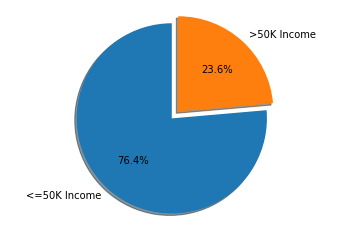

In [13]:
# Distribution of high income vs low income in census dataset :
classes=df_test['high_income'].value_counts()
le_share=classes[0]/df_test['high_income'].count()*100
g_share=classes[1]/df_test['high_income'].count()*100

labels = '<=50K Income', '>50K Income'
sizes = [le_share, g_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

So as anticipated we have **76.4 % population** with annual income less than or equal to 50K USD whereas **remaining 23.4 %** have income more than 50K USD.   
This is **unbalanced dataset** hence, but not highly imbalanced. 

### Handling unwanted character (?) from dataset:
As mentioned in the dataset information, unknown values were replaced with "?". But we need to convert to NaN inorder to perform analysis in pandas to do missing value treatment as applicable.  
Once detected the same will be removed as it will be not adding useful information.

In [14]:
# Perform the operation for both train and test dataset:
df_train[df_train == ' ?'] = np.nan
df_test[df_test == ' ?'] = np.nan

Again check for summary :

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  high_income     32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


We can observe that few of features **workclass, occupation** and **native-country** have the missing values here.  
We will have to perform missing value treatment next.

### Missing Value Analysis and Treatment :

In [16]:
# creating a function to identify the missing data in dataset:

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = round((data.isnull().sum()/data.isnull().count()*100),2).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [17]:
missing_data(df_train)

,Total,Percent
occupation,1843,5.66
workclass,1836,5.64
native-country,583,1.79
high_income,0,0.00
hours-per-week,0,0.00
capital-loss,0,0.00
capital-gain,0,0.00
sex,0,0.00
race,0,0.00
relationship,0,0.00


In [18]:
missing_data(df_test)

,Total,Percent
occupation,966,5.93
workclass,963,5.91
native-country,274,1.68
high_income,0,0.00
hours-per-week,0,0.00
capital-loss,0,0.00
capital-gain,0,0.00
sex,0,0.00
race,0,0.00
relationship,0,0.00


There are missing values for workclass, occupation and native-country. **Missing value percentage is below 6 %** of each attribute.

In [19]:
# Imputing with most frequent value (mode) for categorical data :

df_test = df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_train = df_train.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [20]:
# Assert no null values in whole dataset :
assert df_test.isnull().sum().sum() == 0, 'Expected {}, got {}'.format(0, df_test.isnull().sum().sum())
assert df_train.isnull().sum().sum() == 0, 'Expected {}, got {}'.format(0, df_test.isnull().sum().sum())

In [21]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [22]:
# Selecting only numerical feature from the dataframe:
numeric_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_features)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'high_income']


In [23]:
# Excluding BINARY target feature its not needed for transformation : 
li_not_plot = ['high_income']
li_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]
print(li_num_feats)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [24]:
#seperating categorical features
categorical_features = list(df_train.select_dtypes(include=['object']).columns)
print(categorical_features)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


### Univariate Analysis:

In [25]:
# create df with numeric attributes only: 
numeric_df = df_train[numeric_features]

#### Correlation Analysis :

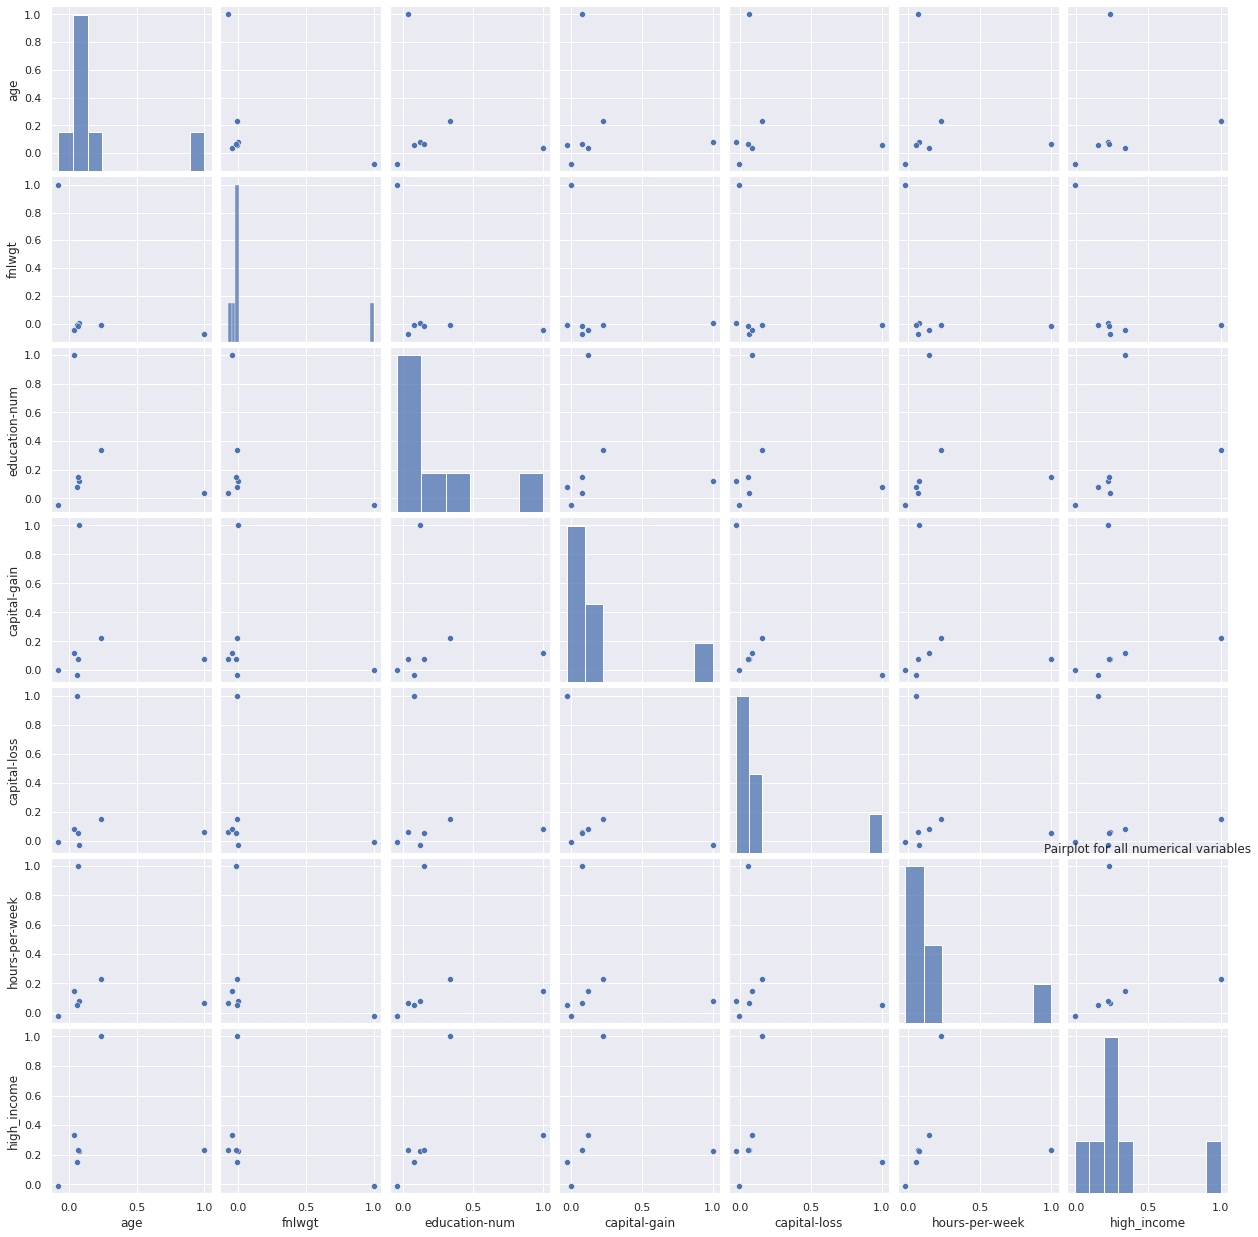

In [26]:
# Visualising all the numeric variables using the pairplot:

income_corr = numeric_df.corr() 
sns.set(font_scale=1) 
sns.pairplot(income_corr,palette="husl") 
plt.title("Pairplot for all numerical variables")
plt.show()

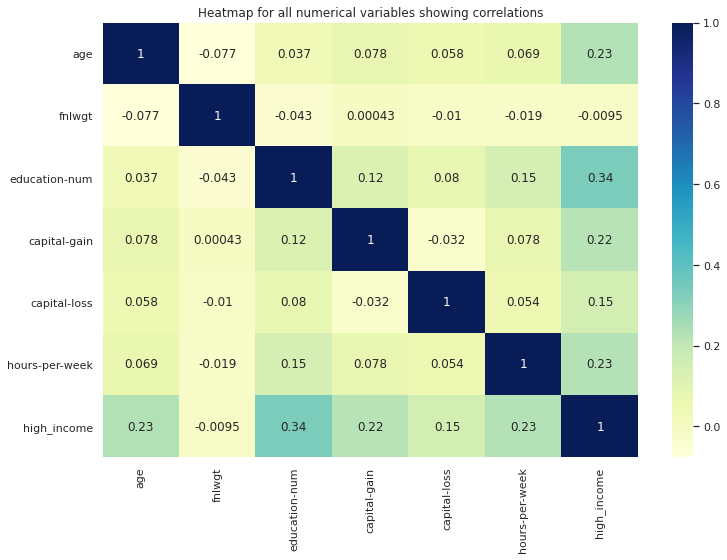

In [27]:
# Visualising the full data using the heatmap:
plt.figure(figsize = (12,8))  
plt.title("Heatmap for all numerical variables showing correlations")
sns.heatmap(income_corr, cmap="YlGnBu", annot = True)
plt.show()

There seems to be **weak direct correlation** with income for original features, eductaion-num years is having highest correlation among them which is 0.34.  
We see that most of the features are positively correlated with the Income Variable.

#### Outliers Analysis:

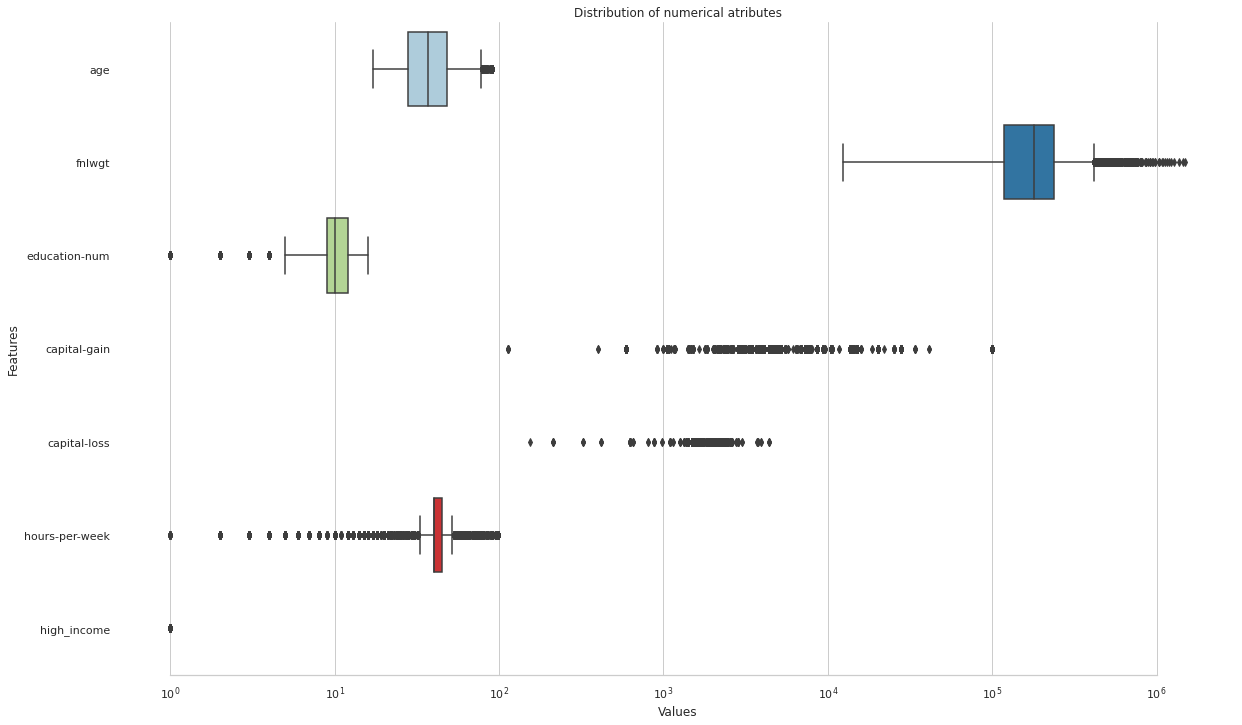

In [28]:
# Boxplot to understand the distribution of numerical attributes :

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20,12))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=df_train[numeric_features] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

Some evident statistical outliers are for **hours-per-week** and **fnlwgt**

### Bivariate and Multivariate Analysis:

#### Categorical Data Visualization :

Bivariate Analysis of high_income with categorical features :

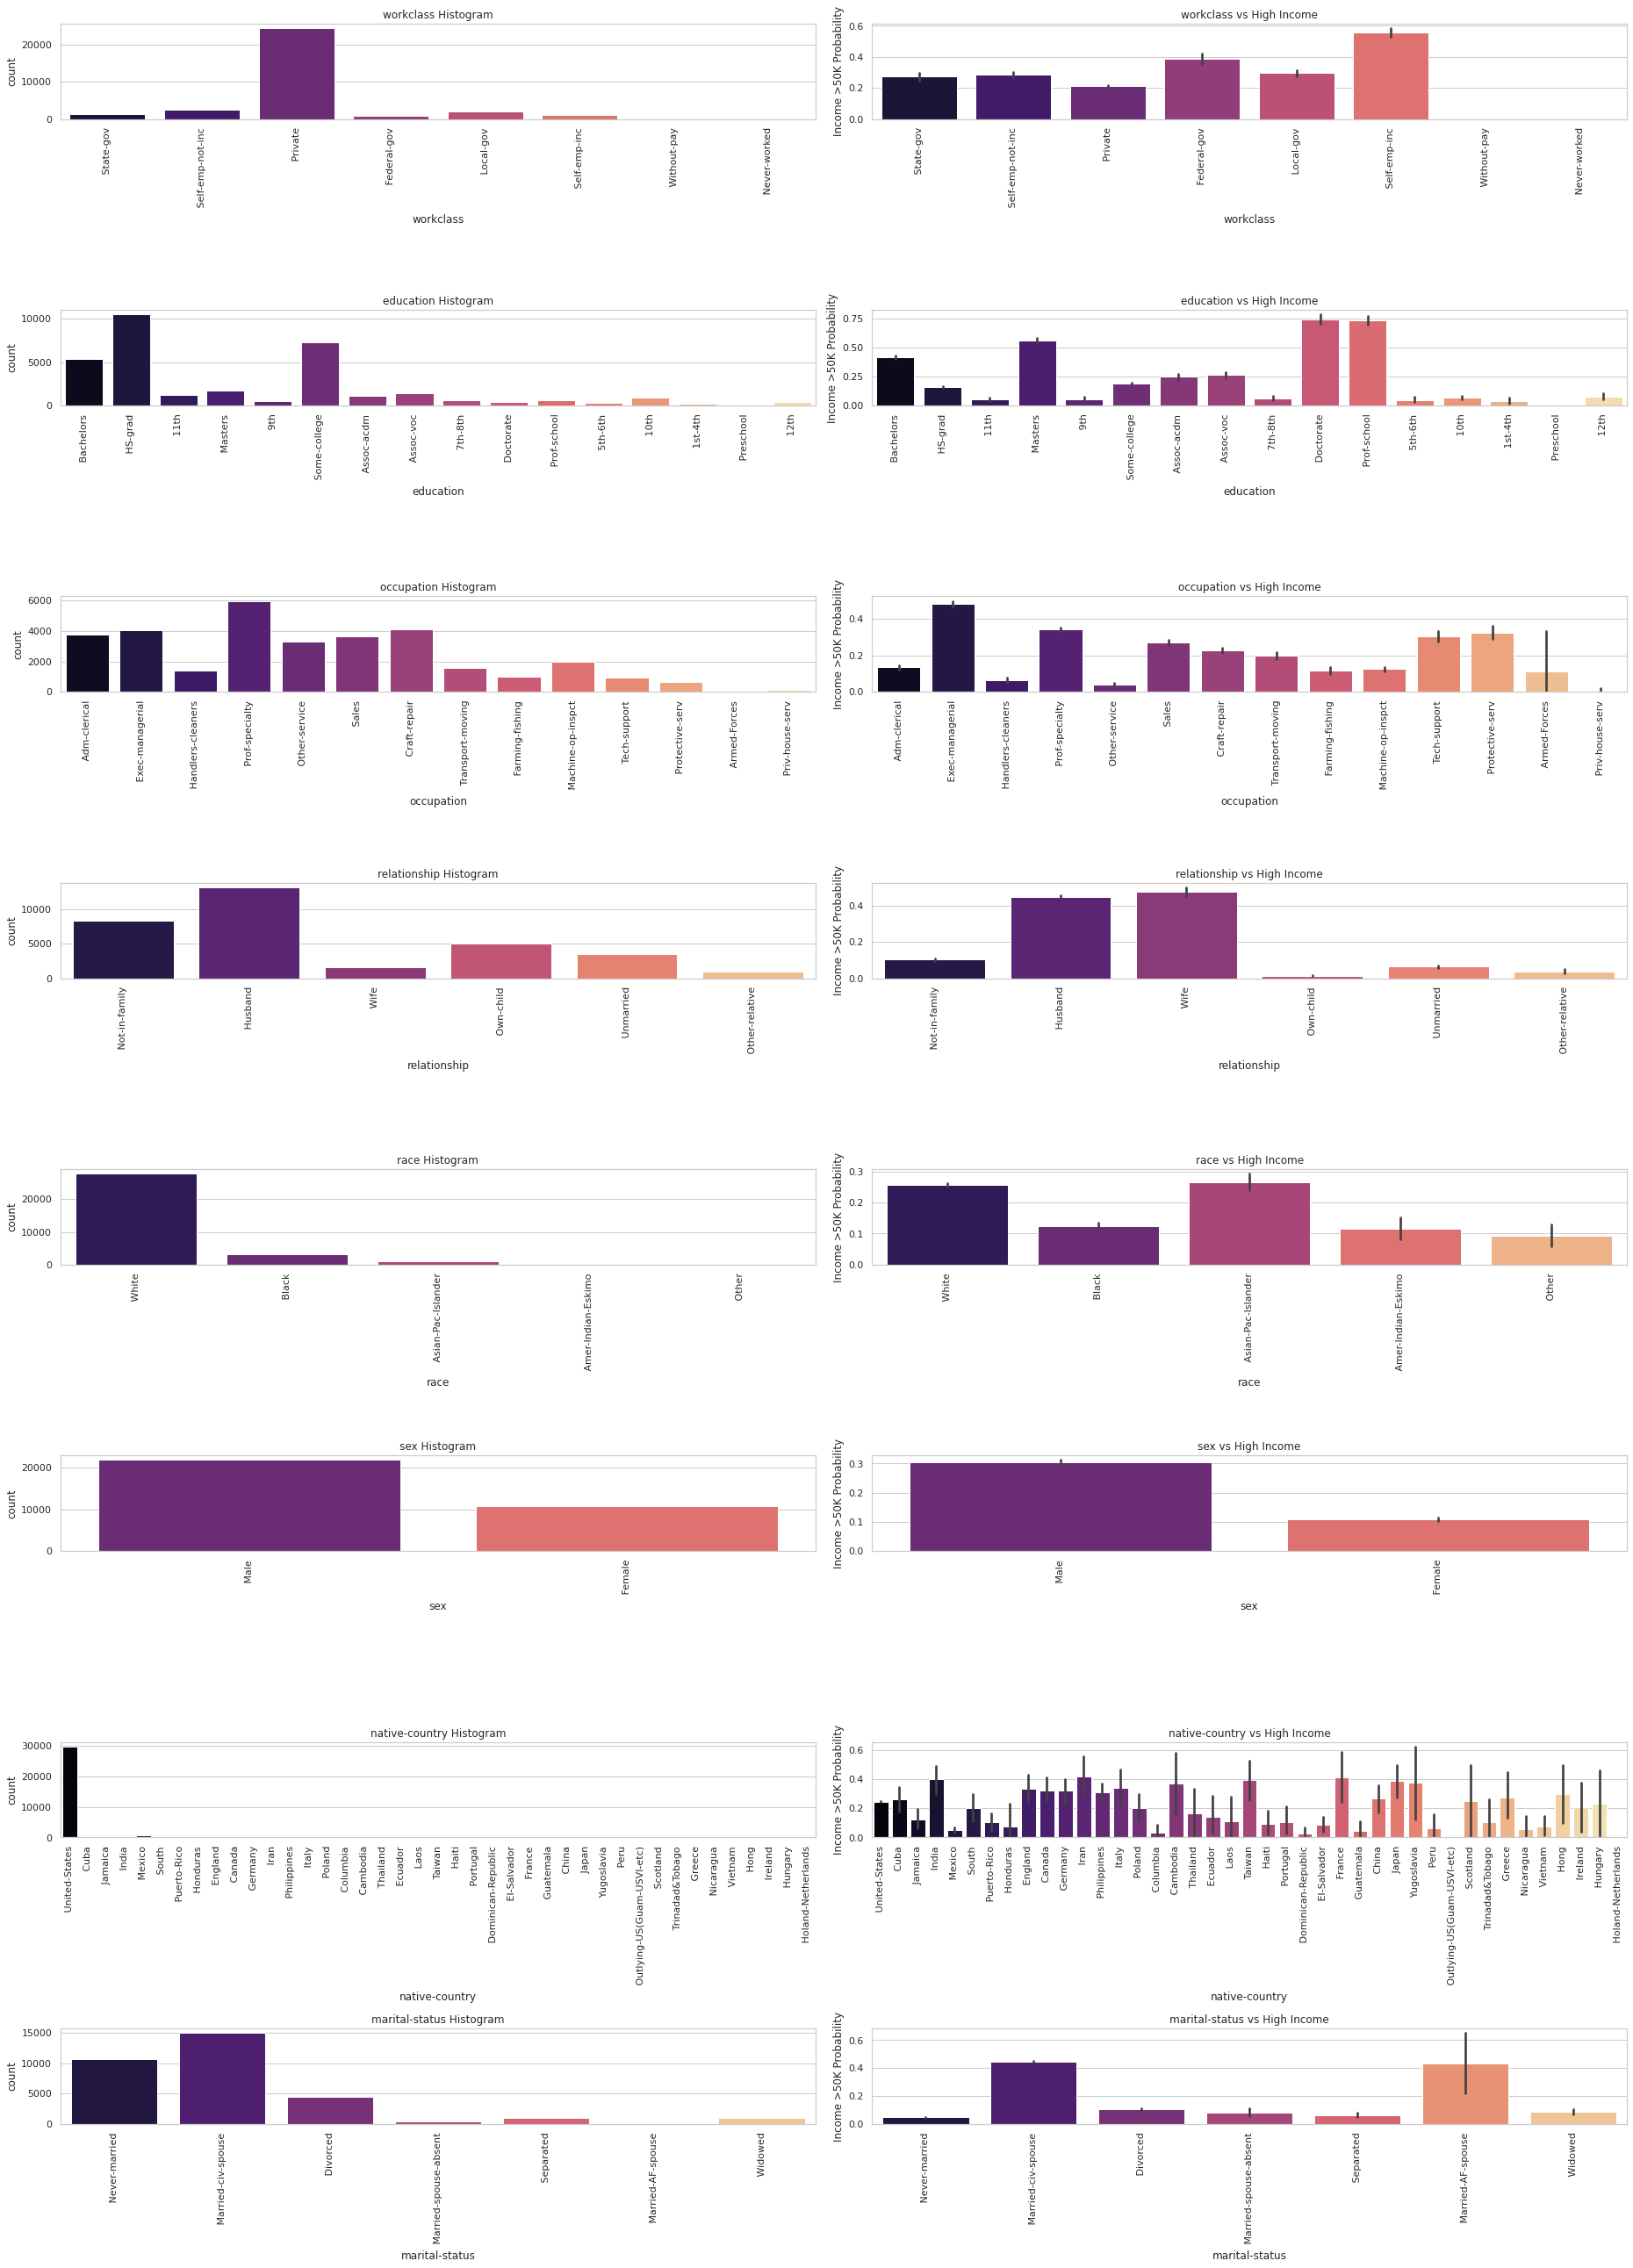

In [29]:
# Performing Bivariate Analysis for high_income against other variables:

def plot_count(x,fig):
    plt.subplot(8,2,fig)
    plt.title(x+' Histogram')
    plt.xticks(rotation = 90)
    sns.countplot(df_train[x],palette=("magma"))
    plt.subplot(8,2,(fig+1))
    plt.title(x+' vs High Income')
    g = sns.barplot(x=df_train[x], y="high_income", data = df_train, palette="magma")
    g = g.set_ylabel("Income >50K Probability")
    plt.xticks(rotation = 90)

    
plt.figure(figsize=(26,36))

plot_count('workclass', 1)
plot_count('education', 3)
plot_count('occupation', 5)
plot_count('relationship', 7)
plot_count('race', 9)
plot_count('sex', 11)
plot_count('native-country', 13)
plot_count('marital-status', 15)

plt.tight_layout()

Some Interesting Observations :   
  1. Highest number of people in survey are from **private working class** followed by self-employed not inc and local government employees. But the higher income is mostly associated with different class      which are **self-employee inc** and **federal government** working class. There are hardly any data for both without pay and never worked. 
  2. Regarding education highest number of participants are **high school graduates**, followed by some-college and bachelors education qualification. Citizens with **doctorate and professional school**        degree seems to be earning most.
  3. **Professional speciality** and craft-repair professionals are highest in numbers. **Exec-managerial professional** seems to be earning maximum.  
  4. Most number of people are **husbands** followed by not-in-family. Interestingly **wife seems to be earning most** and even more than husbands. 
  5. As the census is done in US, most number of people are from **white ethnic group** followed by black with huge margin. Data suggests that **asia pacific islander race people are earning most** even        marginally more than native white people. 
  6. **Male earns more and are more in number** than their female counterparts. 
  7. Since this survey was in US, **most number of people are from US**, followed by very small number form mexico. People from country **France, Iran, India and Japan** are making more money compared to      others and even more than US. 
  8. Highest number of people are from **Married-civ-spouse** category followed by Never married category. Participants with marital status as **Married-civ-spouse** and **Married-AF-spouse** are making
     most mmoney. 

#### Numerical Data Visualisation:

Age vs high-income analysis :

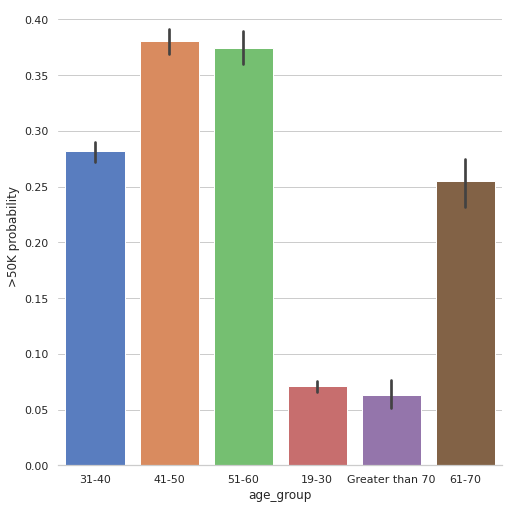

In [30]:
# creating age subgroups:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df_train['age_group'] = df_train['age'].apply(age_group)

g = sns.factorplot(x="age_group",y="high_income",data=df_train,kind="bar",size = 7,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

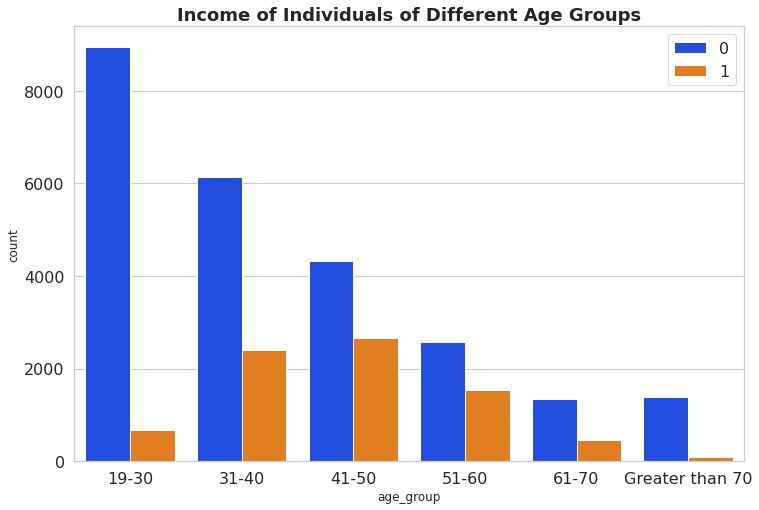

In [31]:
plt.figure(figsize=(12, 8))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df_train['age_group'], hue = df_train['high_income'], palette='bright', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [32]:
# Dropping age group as we will not need again :
df_train.drop('age_group', inplace = True, axis = 1)

Some Interesting Observations:  
    1. Earning more than 50K is very less for **age group 19-30**  
    2. For the people of age group **41-50** and **51-60**, the number of people earning **more than 50K** is quite comprable to those earning less than 50K.  
    3. Least earning age groups are senior citizens i.e. **more than 70 years**  

Hours per week analysis :

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

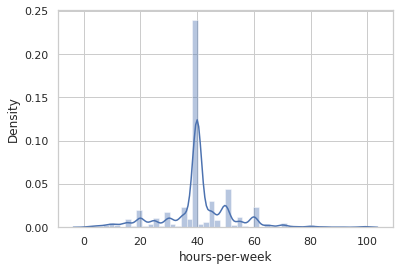

In [33]:
sns.distplot(df_train['hours-per-week'])

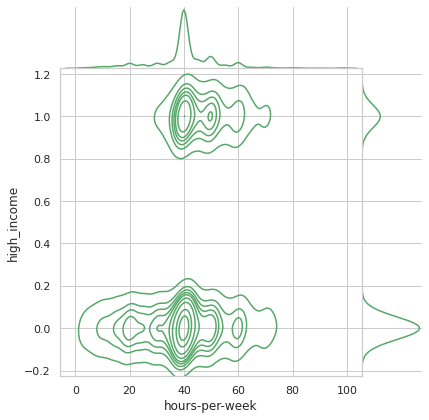

In [34]:
g = sns.jointplot("hours-per-week", "high_income", data=df_train,
                   kind="kde", space=0, color="g")

Most of the people are working around **40 hours per week**

Distribution of education-num vs high-income:

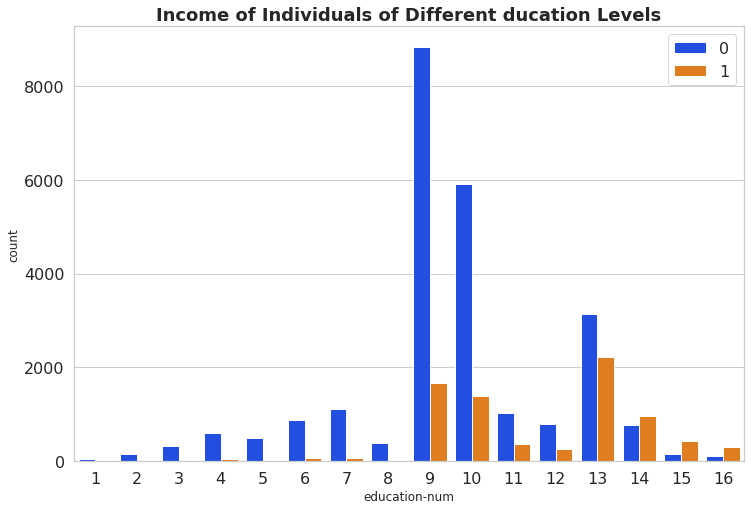

In [35]:
plt.figure(figsize=(12, 8))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df_train['education-num'], hue = df_train['high_income'], palette='bright')
plt.title('Income of Individuals of Different ducation Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

Some Interesting Observations :
  1. Highest number of individuals are from **education number 9**, followed by 10. 
  2. Interestingly individuals having **education number 13 are highest** in number for earning **more than 50K**.

Capital gain and Capital loss analysis with high-income :

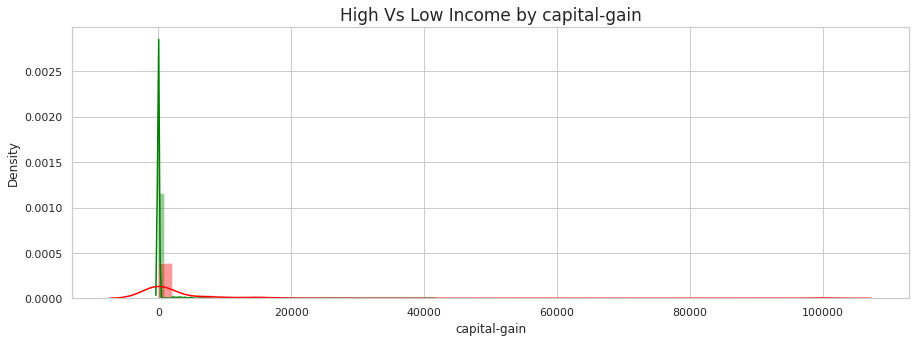

In [36]:
plt.figure(figsize=(15,5))
sns.distplot(df_train[df_train['high_income'] == 0]["capital-gain"], color='green')
sns.distplot(df_train[df_train['high_income'] == 1]["capital-gain"], color='red')
plt.title('High Vs Low Income by capital-gain', fontsize=17)
plt.show()

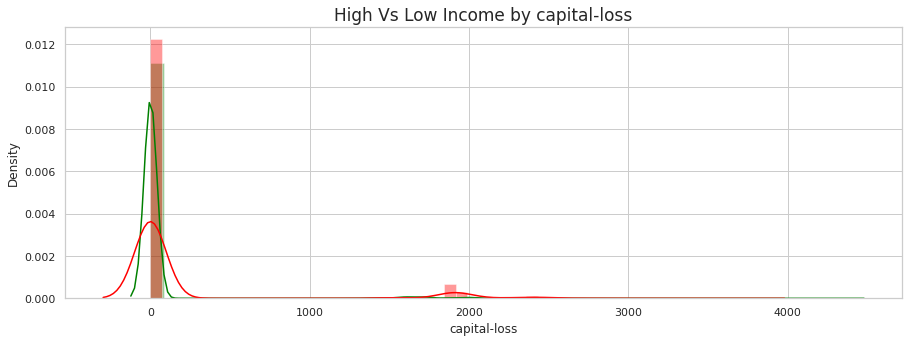

In [37]:
plt.figure(figsize=(15,5))
sns.distplot(df_train[df_train['high_income'] == 0]["capital-loss"], color='green')
sns.distplot(df_train[df_train['high_income'] == 1]["capital-loss"], color='red')
plt.title('High Vs Low Income by capital-loss', fontsize=17)
plt.show()

For capital gain and loss data is concentated around 0 value mostly.

### Feature Engineering:

Dropping education.num 

In [38]:
# Dropping education.num as its redundent which already have an oridinal representation in the form of "education" column:
df_train.drop("education-num",axis=1,inplace=True)
df_test.drop("education-num",axis=1,inplace=True)

In [39]:
df_train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,high_income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### Encode categorical variables:

In [40]:
# Use sklearn pre-processing :
for feature in categorical_features:
        le = preprocessing.LabelEncoder()
        df_train[feature] = le.fit_transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])

In [41]:
df_train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,high_income
0,39,6,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,2,9,5,2,0,0,0,40,4,0


#### Setting feature vector and target variable:

In [42]:
x_train = df_train.iloc[:,0:13]
y_train = df_train.iloc[:,-1]
x_test = df_test.iloc[:,0:13]
y_test = df_test.iloc[:,-1]

In [93]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(32561, 13) (39074,) (16281, 13) (9768,)


#### Feature Scaling :

In [44]:
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [45]:
x_test.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.995706,-0.085296,0.350774,-2.402511,0.921634,-0.034928,0.966947,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.26137
1,-0.042642,-0.085296,-0.947095,0.181332,-0.406212,-0.538370,-0.900181,0.393668,0.703071,-0.145920,-0.21666,0.774468,0.26137
2,-0.775768,-1.891692,1.394362,-0.852205,-0.406212,0.971958,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.26137
3,0.397233,-0.085296,-0.279070,1.214869,-0.406212,-0.034928,-0.900181,-1.962621,0.703071,0.895083,-0.21666,-0.035429,0.26137
4,-1.508894,-0.085296,-0.817458,1.214869,0.921634,0.720237,0.966947,0.393668,-1.422331,-0.145920,-0.21666,-0.845327,0.26137


In [46]:
x_train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.030671,2.624298,-1.063611,-0.335437,0.921634,-1.545256,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.26137
1,0.837109,1.721100,-1.008707,-0.335437,-0.406212,-0.790092,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.26137
2,-0.042642,-0.085296,0.245079,0.181332,-1.734058,-0.286649,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.26137
3,1.057047,-0.085296,0.425801,-2.402511,-0.406212,-0.286649,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.26137
4,-0.775768,-0.085296,1.408176,-0.335437,-0.406212,0.720237,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-5.35294


In [47]:
# All variables are numerical now and ready for modelling now.

# Step 3 : Modelling and Model Evaluation:  
Now we will explore different classification models to see which model gives us better result.

In [48]:
# Creating function to plot confusion matrix :

def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

### Step 3.1 Using Logitic regression model:

In [49]:

def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

### Step 3.2 Using KNN model:

In [50]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### Step 3.3 Using Decision Tree model:

In [51]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### Step 3.4 Using Random Forest model:

In [52]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

### Step 3.5 Using XGBoost model:

In [53]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results
  

## Run all  models now using different transformers, class balancing techniques, cross validations etc 

In [54]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

### Using Power transformer for all algorithms :
**Power Transformer** package present in the preprocessing library provided by sklearn to make distribution more gaussian

In [55]:
pt = PowerTransformer()
pt.fit(x_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(x_train)    ## Then apply on all data
X_test_pt = pt.transform(x_test)

In [56]:
cols = list(x_train.columns.values)
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.8151162823156021
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.47861599 -0.09792727  0.05277366  0.15944053 -0.23920216  0.06822307
  -0.54611248  0.11129747  0.11748736  0.49001528  0.27289431  0.42514737
   0.02936609]]
[-1.56826091]
{1: array([[0.81908557, 0.81908557, 0.81908608, 0.81908557, 0.81914962,
        0.81957305, 0.82129525, 0.82238255, 0.82265755, 0.82266111,
        0.82266111, 0.82266111, 0.82266111, 0.82266111, 0.82266111,
        0.82266111, 0.82266111, 0.82266111, 0.82266111, 0.82266111],
       [0.80339407, 0.80339668, 0.80339668, 0.80339721, 0.8033993 ,
        0.80418813, 0.80740406, 0.81071925, 0.81135397, 0.81141091,
        0.81141091, 0.81141091, 0.81140151, 0.81140151, 0.81140151,
        0.81140151, 0.81140151, 0.81140151, 0.81140151, 0.81140151],
       [0.81183552, 0.81183391, 0.81183391, 0.81183552, 0.81184463,
        0.81247874, 0.81513947, 0.81704665, 0.81733746, 0

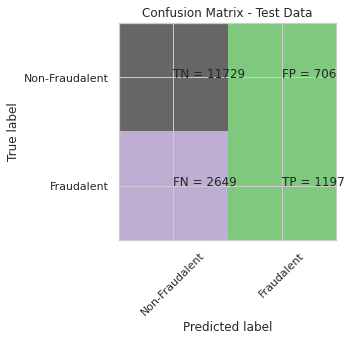

classification Report
              precision    recall  f1-score   support

           0       0.82      0.94      0.87     12435
           1       0.63      0.31      0.42      3846

    accuracy                           0.79     16281
   macro avg       0.72      0.63      0.65     16281
weighted avg       0.77      0.79      0.77     16281

Accuarcy of Logistic model with l1 regularisation : 0.7637737239727289
Confusion Matrix


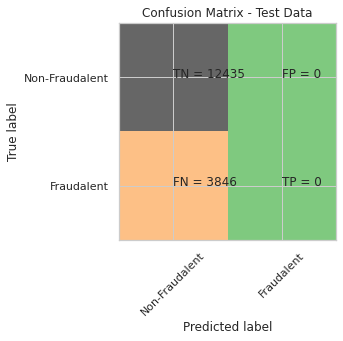

classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12435
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281

l2 roc_value: 0.8157386166777593
l2 threshold: 0.23638847789137266
ROC for the test dataset 81.6%


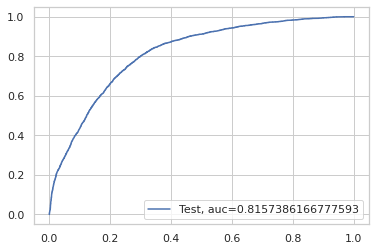

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


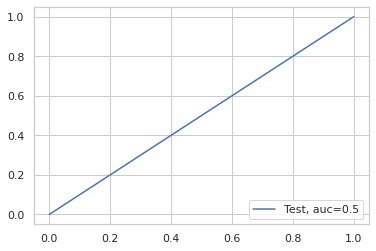

Time Taken by Model: --- 11.823609590530396 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.814446287083103
Confusion Matrix


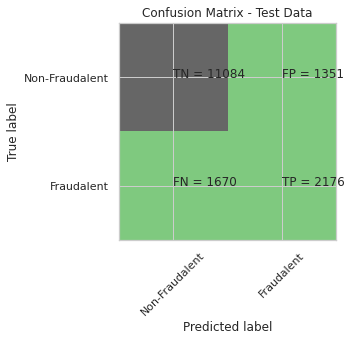

classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12435
           1       0.62      0.57      0.59      3846

    accuracy                           0.81     16281
   macro avg       0.74      0.73      0.74     16281
weighted avg       0.81      0.81      0.81     16281

KNN roc_value: 0.8338745668845651
KNN threshold: 0.4
ROC for the test dataset 83.4%


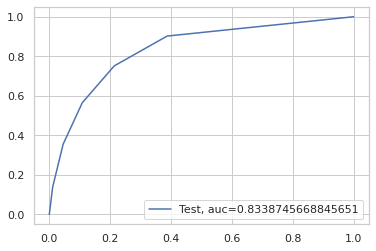

Time Taken by Model: --- 30.853551626205444 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.7982310668877833
Confusion Matrix


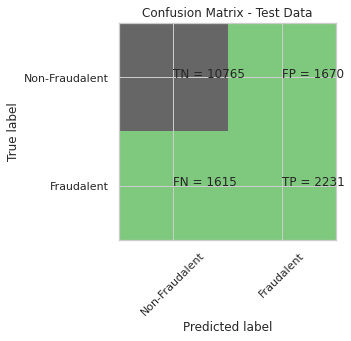

classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     12435
           1       0.57      0.58      0.58      3846

    accuracy                           0.80     16281
   macro avg       0.72      0.72      0.72     16281
weighted avg       0.80      0.80      0.80     16281

gini tree_roc_value: 0.7228924259503553
Tree threshold: 1.0
ROC for the test dataset 72.3%


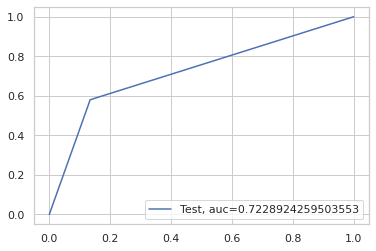

entropy score: 0.8023462932252319
Confusion Matrix


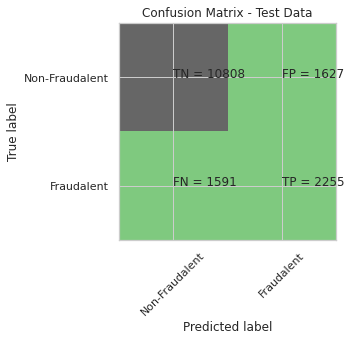

classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     12435
           1       0.58      0.59      0.58      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.73      0.73     16281
weighted avg       0.80      0.80      0.80     16281

entropy tree_roc_value: 0.7277415415072573
Tree threshold: 1.0
ROC for the test dataset 72.8%


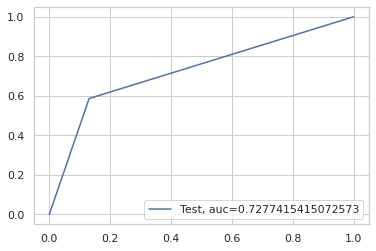

Time Taken by Model: --- 1.5602333545684814 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8506848473680978
Confusion Matrix


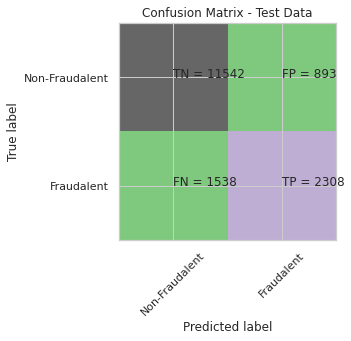

classification Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.72      0.60      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.76      0.78     16281
weighted avg       0.84      0.85      0.85     16281

Random Forest roc_value: 0.9009200939006599
Random Forest threshold: 0.23
ROC for the test dataset 90.1%


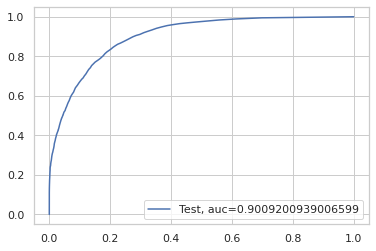

Time Taken by Model: --- 5.525606393814087 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.8620477857625453
Confusion Matrix


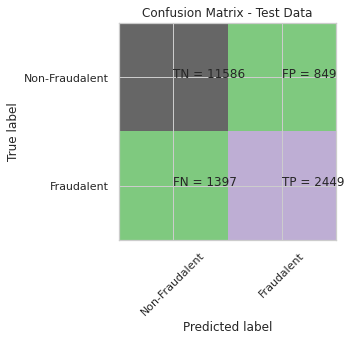

classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.74      0.64      0.69      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.78      0.80     16281
weighted avg       0.86      0.86      0.86     16281

XGboost roc_value: 0.9170479211609156
XGBoost threshold: 0.22552251815795898
ROC for the test dataset 91.7%


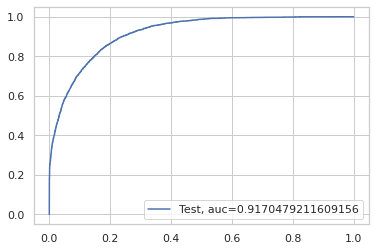

Time Taken by Model: --- 2.0845131874084473 seconds ---
--------------------------------------------------------------------------------


In [57]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [58]:
df_Results.head()

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.793932,0.815739,0.236388
1,Power Transformer,Logistic Regression with L1 Regularisation,0.763774,0.500000,1.500000
2,Power Transformer,KNN,0.814446,0.833875,0.400000
3,Power Transformer,Tree Model with gini criteria,0.798231,0.722892,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.802346,0.727742,1.000000


Best performing model if we use power transformer is **KNN with power transformer**. It has acheived **accuracy of 81.5 %** and **ROC value as 0.84**

### Using RepeatedKFold Cross Validation for all models:

In [59]:
X = pd.concat([x_train, x_test], ignore_index=True, sort=False)
X.shape

(48842, 13)

In [60]:
y = pd.concat([y_train, y_test], ignore_index=True, sort=False)
y.shape

(48842,)

In [61]:
#Lets perfrom RepeatedKFold and check the results

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [    0     1     3 ... 48839 48840 48841] TEST: [    2    10    12 ... 48828 48829 48838]
TRAIN: [    2     3     4 ... 48839 48840 48841] TEST: [    0     1     5 ... 48806 48823 48830]
TRAIN: [    0     1     2 ... 48838 48840 48841] TEST: [    6    11    13 ... 48826 48833 48839]
TRAIN: [    0     1     2 ... 48838 48839 48841] TEST: [    7     8    30 ... 48836 48837 48840]
TRAIN: [    0     1     2 ... 48838 48839 48840] TEST: [    3     4    17 ... 48818 48831 48841]
TRAIN: [    2     4     5 ... 48839 48840 48841] TEST: [    0     1     3 ... 48830 48836 48837]
TRAIN: [    0     1     2 ... 48839 48840 48841] TEST: [    4     8    14 ... 48820 48827 48838]
TRAIN: [    0     1     2 ... 48838 48839 48841] TEST: [    5     7    19 ... 48818 48823 48840]
TRAIN: [    0     1     2 ... 48838 48840 48841] TEST: [   10    11    17 ... 48829 48835 48839]
TRAIN: [    0     1     3 ... 48838 48839 48840] TEST: [    2     6     9 ... 48833 48834 48841]
TRAIN: [    0     1     3 ... 

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.8151766049174552
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.41434856 -0.10813148  0.03093469  0.23746671 -0.32632603  0.07068841
  -0.30297747  0.10051775  0.32217993  2.2950389   0.29507812  0.40491676
   0.00356948]]
[-1.3525727]
{1: array([[0.78262467, 0.78262681, 0.78262681, 0.78262859, 0.78277267,
        0.7834984 , 0.78650082, 0.79869775, 0.8068641 , 0.80773355,
        0.80779347, 0.80779347, 0.80779347, 0.80779347, 0.80779347,
        0.80779347, 0.80779347, 0.80779347, 0.80779347, 0.80779347],
       [0.78034492, 0.78034383, 0.78034383, 0.78035071, 0.78035107,
        0.78109219, 0.78369479, 0.79700165, 0.80426665, 0.80444433,
        0.80444252, 0.80444252, 0.80444252, 0.80444252, 0.80444252,
        0.80444252, 0.80444252, 0.80444252, 0.80444252, 0.80444252],
       [0.8048351 , 0.80483835, 0.80483835, 0.80483907, 0.80485026,
        0.80555724, 0.80787243, 0.81780621, 0.82390144, 0.

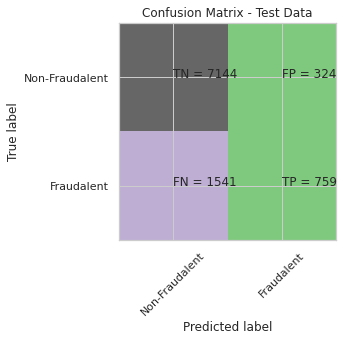

classification Report
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7468
           1       0.70      0.33      0.45      2300

    accuracy                           0.81      9768
   macro avg       0.76      0.64      0.67      9768
weighted avg       0.79      0.81      0.78      9768

Accuarcy of Logistic model with l1 regularisation : 0.7645372645372646
Confusion Matrix


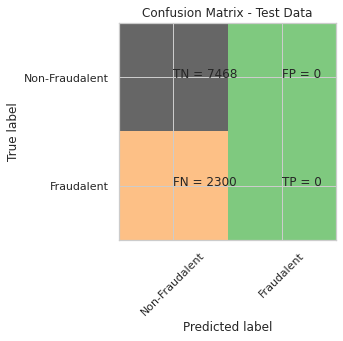

classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      7468
           1       0.00      0.00      0.00      2300

    accuracy                           0.76      9768
   macro avg       0.38      0.50      0.43      9768
weighted avg       0.58      0.76      0.66      9768

l2 roc_value: 0.808890629002585
l2 threshold: 0.22064358306838275
ROC for the test dataset 80.9%


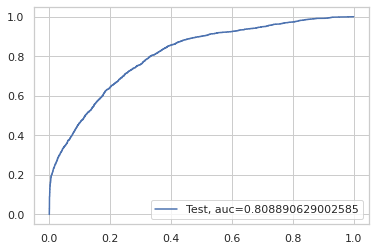

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


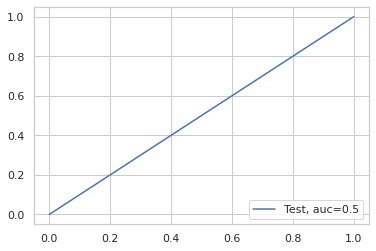

Time Taken by Model: --- 15.361753225326538 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.8220720720720721
Confusion Matrix


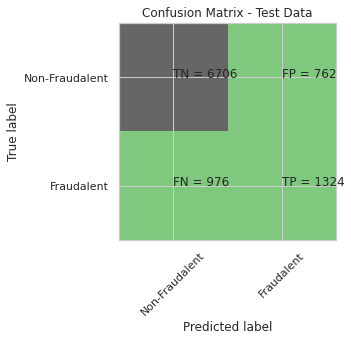

classification Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7468
           1       0.63      0.58      0.60      2300

    accuracy                           0.82      9768
   macro avg       0.75      0.74      0.74      9768
weighted avg       0.82      0.82      0.82      9768

KNN roc_value: 0.8370911541417293
KNN threshold: 0.4
ROC for the test dataset 83.7%


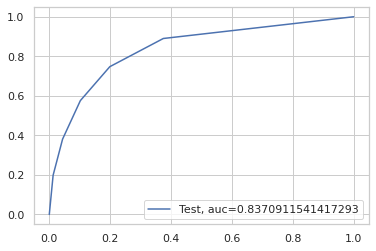

Time Taken by Model: --- 23.695324182510376 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.8108108108108109
Confusion Matrix


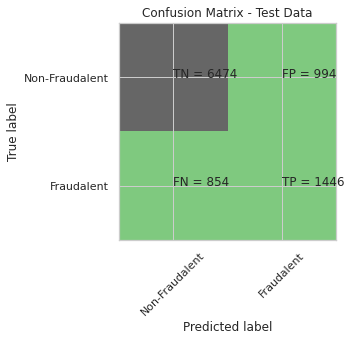

classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7468
           1       0.59      0.63      0.61      2300

    accuracy                           0.81      9768
   macro avg       0.74      0.75      0.74      9768
weighted avg       0.81      0.81      0.81      9768

gini tree_roc_value: 0.7477474907431126
Tree threshold: 1.0
ROC for the test dataset 74.8%


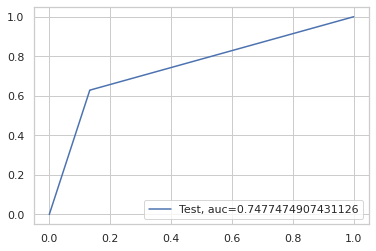

entropy score: 0.8119369369369369
Confusion Matrix


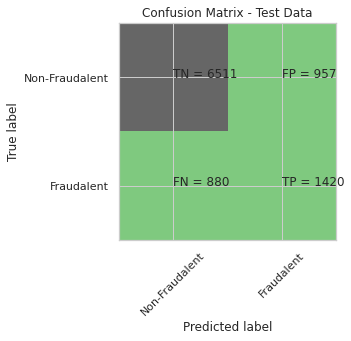

classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7468
           1       0.60      0.62      0.61      2300

    accuracy                           0.81      9768
   macro avg       0.74      0.74      0.74      9768
weighted avg       0.81      0.81      0.81      9768

entropy tree_roc_value: 0.744596655876668
Tree threshold: 1.0
ROC for the test dataset 74.5%


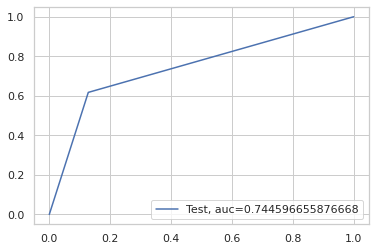

Time Taken by Model: --- 1.2069129943847656 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8583128583128583
Confusion Matrix


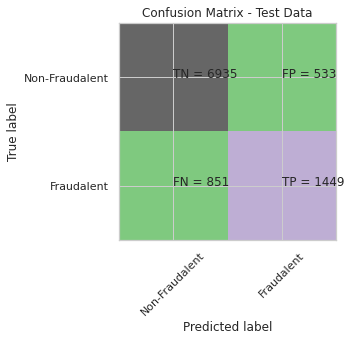

classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7468
           1       0.73      0.63      0.68      2300

    accuracy                           0.86      9768
   macro avg       0.81      0.78      0.79      9768
weighted avg       0.85      0.86      0.85      9768

Random Forest roc_value: 0.9040502957546401
Random Forest threshold: 0.26
ROC for the test dataset 90.4%


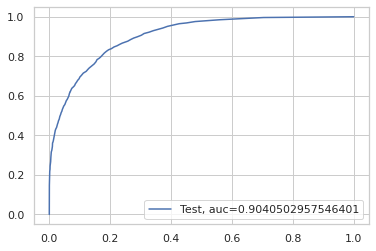

Time Taken by Model: --- 5.55443549156189 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.8718263718263718
Confusion Matrix


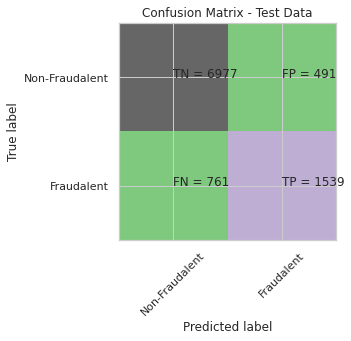

classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      7468
           1       0.76      0.67      0.71      2300

    accuracy                           0.87      9768
   macro avg       0.83      0.80      0.81      9768
weighted avg       0.87      0.87      0.87      9768

XGboost roc_value: 0.9233249400340001
XGBoost threshold: 0.3383384048938751
ROC for the test dataset 92.3%


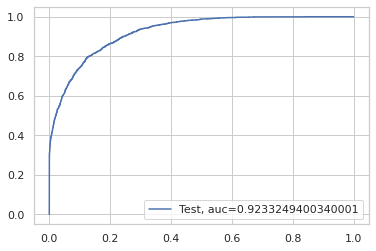

Time Taken by Model: --- 2.023454189300537 seconds ---
--------------------------------------------------------------------------------


In [62]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [63]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.793932,0.815739,0.236388
1,Power Transformer,Logistic Regression with L1 Regularisation,0.763774,0.500000,1.500000
2,Power Transformer,KNN,0.814446,0.833875,0.400000
3,Power Transformer,Tree Model with gini criteria,0.798231,0.722892,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.802346,0.727742,1.000000
5,Power Transformer,Random Forest,0.850685,0.900920,0.230000
6,Power Transformer,XGBoost,0.862048,0.917048,0.225523
7,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.809070,0.808891,0.220644
8,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.764537,0.500000,1.500000
9,RepeatedKFold Cross Validation,KNN,0.822072,0.837091,0.400000


Best performing model so far is **XGBoost with repeated K Fold** Cross Validation with **AUC as 0.923 and accuracy as 0.871**

###  Evaluate XGBoost Model :

In [64]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']

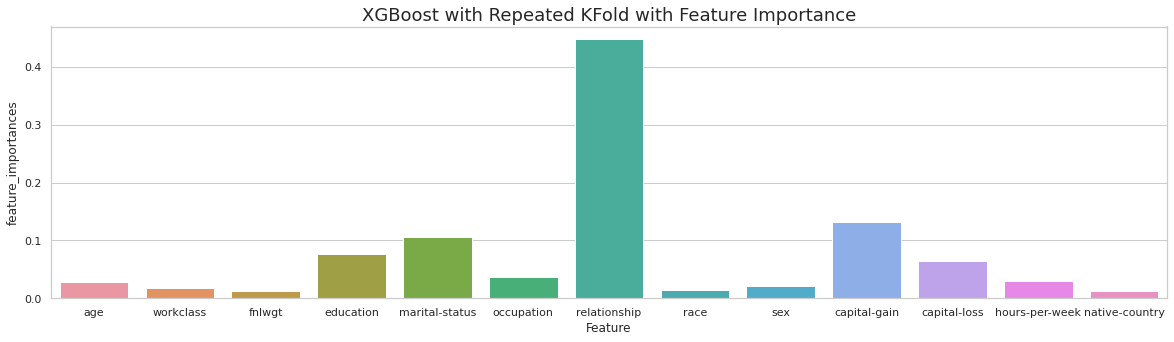

In [65]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold with Feature Importance", fontsize=18)

plt.show()

Most important features from XGBoost Model are **relationship, capital-gain and marital status.**  
Least important features are **fnlwgt, native-country and race.**



### Using StratifiedKFold cross validation for all models:



In [66]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 9746  9747  9748 ... 48839 48840 48841] TEST: [   0    1    2 ... 9820 9822 9824]
TRAIN: [    0     1     2 ... 48839 48840 48841] TEST: [ 9746  9747  9748 ... 19574 19576 19577]
TRAIN: [    0     1     2 ... 48839 48840 48841] TEST: [19523 19524 19526 ... 29332 29333 29334]
TRAIN: [    0     1     2 ... 48839 48840 48841] TEST: [29228 29230 29236 ... 39112 39113 39114]
TRAIN: [    0     1     2 ... 39112 39113 39114] TEST: [38943 38952 38954 ... 48839 48840 48841]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.8150469665448197
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.42591001 -0.09478551  0.03451474  0.23434097 -0.31713947  0.05391126
  -0.27559872  0.10059704  0.32210311  2.27743998  0.30032457  0.41554848
   0.01011785]]
[-1.35776627]
{1: array([[0.80566824, 0.80567036, 0.80567071, 0.80567071, 0.80577333,
        0.80647889, 0.80937051, 0.82214536, 0.82860161, 0.82837408,
        0.82826793, 0.82826793, 0.82826793, 0.82826793, 0.82826793,
        0.82826793, 0.82826793, 0.82826793, 0.82826793, 0.82826793],
       [0.78629566, 0.78629957, 0.78629957, 0.78629992, 0.78641675,
        0.78700657, 0.78960128, 0.80101061, 0.80630514, 0.80613327,
        0.806069  , 0.806069  , 0.806069  , 0.806069  , 0.806069  ,
        0.806069  , 0.806069  , 0.806069  , 0.806069  , 0.806069  ],
       [0.80581346, 0.80581526, 0.8058149 , 0.80581526, 0.80590323,
        0.80654031, 0.80946319, 0.82240651, 0.83000737, 0

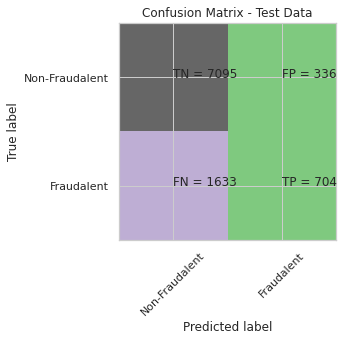

classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7431
           1       0.68      0.30      0.42      2337

    accuracy                           0.80      9768
   macro avg       0.74      0.63      0.65      9768
weighted avg       0.78      0.80      0.77      9768

Accuarcy of Logistic model with l1 regularisation : 0.7607493857493858
Confusion Matrix


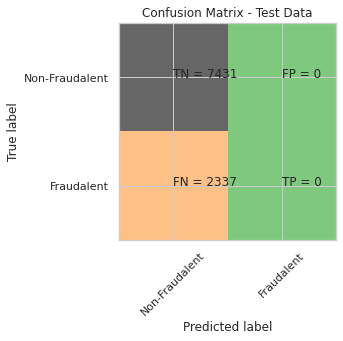

classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7431
           1       0.00      0.00      0.00      2337

    accuracy                           0.76      9768
   macro avg       0.38      0.50      0.43      9768
weighted avg       0.58      0.76      0.66      9768

l2 roc_value: 0.8103665979183643
l2 threshold: 0.2177207910910214
ROC for the test dataset 81.0%


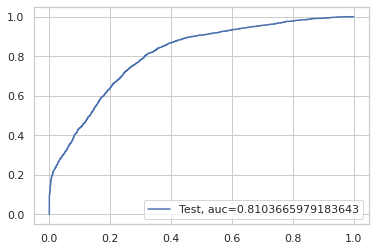

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


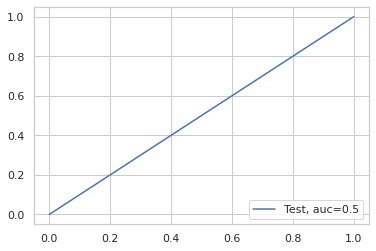

Time Taken by Model: --- 12.337921142578125 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.8237100737100738
Confusion Matrix


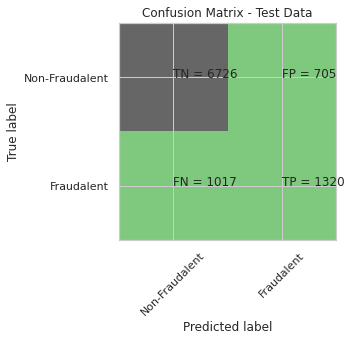

classification Report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7431
           1       0.65      0.56      0.61      2337

    accuracy                           0.82      9768
   macro avg       0.76      0.73      0.75      9768
weighted avg       0.82      0.82      0.82      9768

KNN roc_value: 0.8420257410826876
KNN threshold: 0.4
ROC for the test dataset 84.2%


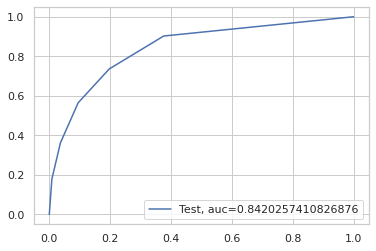

Time Taken by Model: --- 21.373894691467285 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.8064086814086814
Confusion Matrix


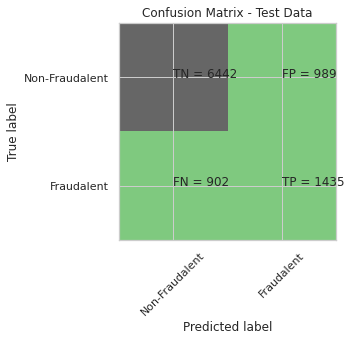

classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7431
           1       0.59      0.61      0.60      2337

    accuracy                           0.81      9768
   macro avg       0.73      0.74      0.74      9768
weighted avg       0.81      0.81      0.81      9768

gini tree_roc_value: 0.7404719914440927
Tree threshold: 1.0
ROC for the test dataset 74.0%


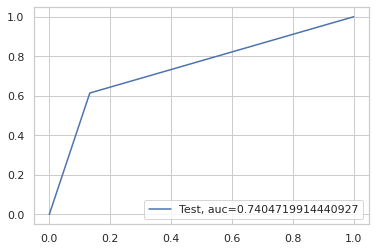

entropy score: 0.8076371826371826
Confusion Matrix


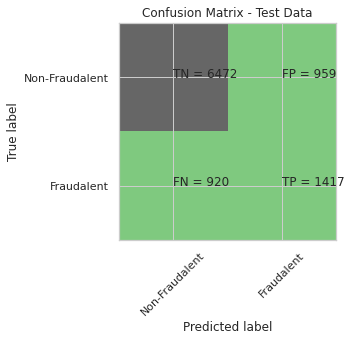

classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7431
           1       0.60      0.61      0.60      2337

    accuracy                           0.81      9768
   macro avg       0.74      0.74      0.74      9768
weighted avg       0.81      0.81      0.81      9768

entropy tree_roc_value: 0.7385864948252779
Tree threshold: 1.0
ROC for the test dataset 73.9%


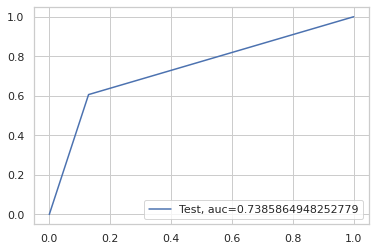

Time Taken by Model: --- 1.2251639366149902 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8586199836199836
Confusion Matrix


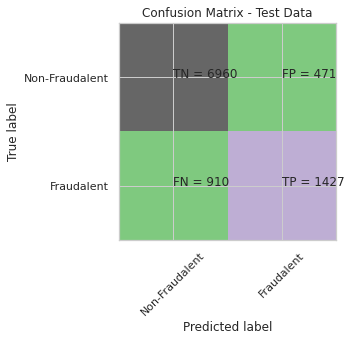

classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7431
           1       0.75      0.61      0.67      2337

    accuracy                           0.86      9768
   macro avg       0.82      0.77      0.79      9768
weighted avg       0.85      0.86      0.85      9768

Random Forest roc_value: 0.904500235427954
Random Forest threshold: 0.22
ROC for the test dataset 90.5%


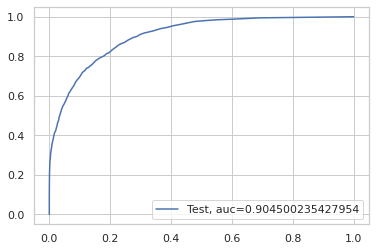

Time Taken by Model: --- 5.54556941986084 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.872031122031122
Confusion Matrix


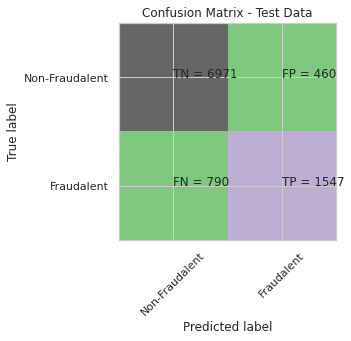

classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7431
           1       0.77      0.66      0.71      2337

    accuracy                           0.87      9768
   macro avg       0.83      0.80      0.81      9768
weighted avg       0.87      0.87      0.87      9768

XGboost roc_value: 0.9244428286664355
XGBoost threshold: 0.24960502982139587
ROC for the test dataset 92.4%


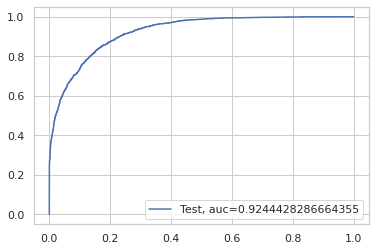

Time Taken by Model: --- 6.191328048706055 seconds ---
--------------------------------------------------------------------------------


In [67]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [68]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.793932,0.815739,0.236388
1,Power Transformer,Logistic Regression with L1 Regularisation,0.763774,0.500000,1.500000
2,Power Transformer,KNN,0.814446,0.833875,0.400000
3,Power Transformer,Tree Model with gini criteria,0.798231,0.722892,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.802346,0.727742,1.000000
5,Power Transformer,Random Forest,0.850685,0.900920,0.230000
6,Power Transformer,XGBoost,0.862048,0.917048,0.225523
7,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.809070,0.808891,0.220644
8,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.764537,0.500000,1.500000
9,RepeatedKFold Cross Validation,KNN,0.822072,0.837091,0.400000


Best performing model so far is **XGBoost with StratifiedKFold Cross Validation** having **AUC 0.924** and **accuracy as 87.2 %**

### Applying Undersampling technique with all models :

In [69]:

#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(x_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.8123378649833322
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 4.58494778e-01 -8.93914882e-02  3.28823822e-02  2.26619632e-01
  -3.37411876e-01  7.06516598e-02 -2.14603129e-01  1.01845591e-01
   3.45817281e-01  2.27170519e+00  2.93436012e-01  4.38272863e-01
   6.48480066e-04]]
[-0.91119332]
{1: array([[0.7990374 , 0.79903983, 0.79904146, 0.79904308, 0.79910885,
        0.79951399, 0.80173944, 0.81240633, 0.82030784, 0.82047753,
        0.82031596, 0.82031596, 0.82031596, 0.82031596, 0.82031596,
        0.82031596, 0.82031596, 0.82031596, 0.82031596, 0.82031596],
       [0.7794693 , 0.77947011, 0.77947011, 0.77947011, 0.77947092,
        0.77972457, 0.7813518 , 0.79115086, 0.80043858, 0.80156176,
        0.80169466, 0.80169466, 0.80169466, 0.80169466, 0.80169466,
        0.80169466, 0.80169466, 0.80169466, 0.80169466, 0.80169466],
       [0.78924614, 0.78924779, 0.78924779, 0.78924614, 0.78925438,
   

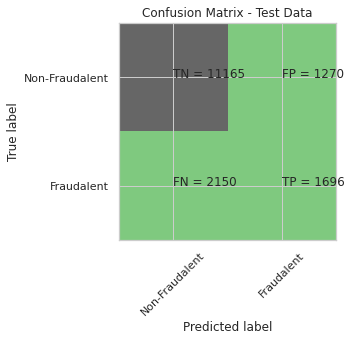

classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     12435
           1       0.57      0.44      0.50      3846

    accuracy                           0.79     16281
   macro avg       0.71      0.67      0.68     16281
weighted avg       0.78      0.79      0.78     16281

Accuarcy of Logistic model with l1 regularisation : 0.7637737239727289
Confusion Matrix


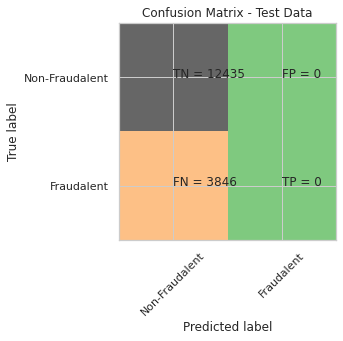

classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12435
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281

l2 roc_value: 0.8123508494823106
l2 threshold: 0.29065571262803774
ROC for the test dataset 81.2%


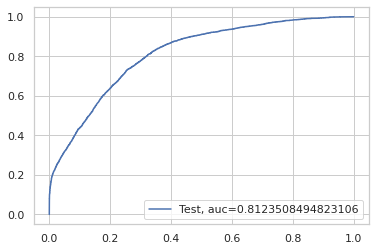

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


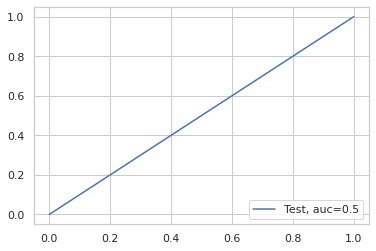

Time Taken by Model: --- 11.316316843032837 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.8079970517781463
Confusion Matrix


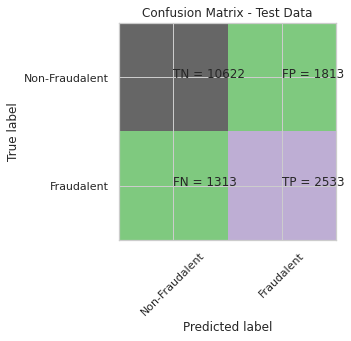

classification Report
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     12435
           1       0.58      0.66      0.62      3846

    accuracy                           0.81     16281
   macro avg       0.74      0.76      0.75     16281
weighted avg       0.82      0.81      0.81     16281

KNN roc_value: 0.8467047262509722
KNN threshold: 0.4
ROC for the test dataset 84.7%


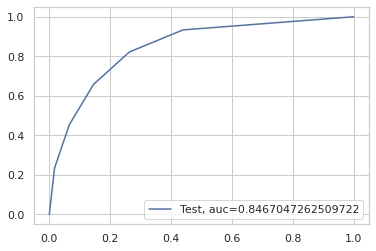

Time Taken by Model: --- 36.85930013656616 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.798783858485351
Confusion Matrix


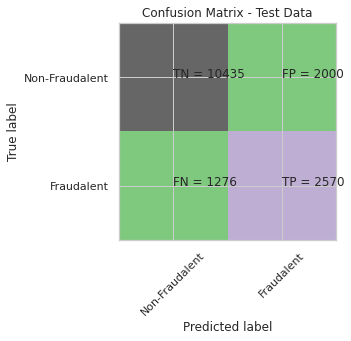

classification Report
              precision    recall  f1-score   support

           0       0.89      0.84      0.86     12435
           1       0.56      0.67      0.61      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.75      0.74     16281
weighted avg       0.81      0.80      0.80     16281

gini tree_roc_value: 0.7536951900271427
Tree threshold: 1.0
ROC for the test dataset 75.4%


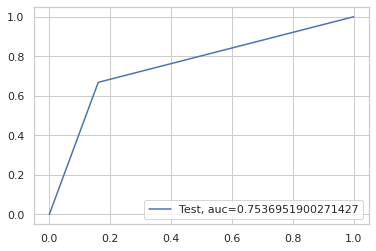

entropy score: 0.8038204041520791
Confusion Matrix


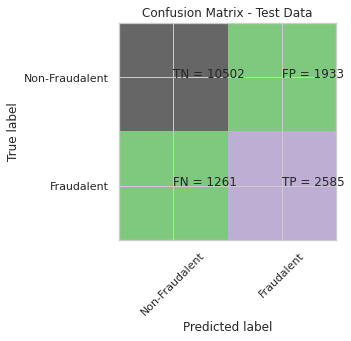

classification Report
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     12435
           1       0.57      0.67      0.62      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.76      0.74     16281
weighted avg       0.82      0.80      0.81     16281

entropy tree_roc_value: 0.758339276876262
Tree threshold: 1.0
ROC for the test dataset 75.8%


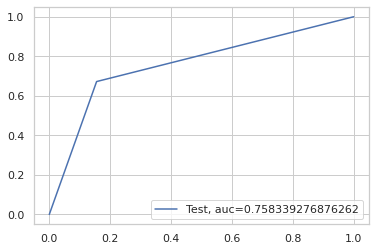

Time Taken by Model: --- 1.1029891967773438 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8469995700509797
Confusion Matrix


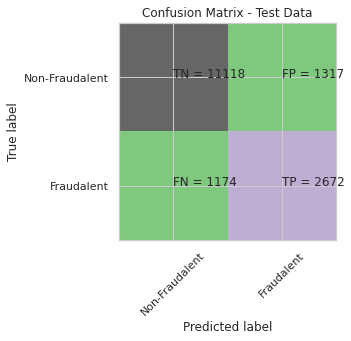

classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     12435
           1       0.67      0.69      0.68      3846

    accuracy                           0.85     16281
   macro avg       0.79      0.79      0.79     16281
weighted avg       0.85      0.85      0.85     16281

Random Forest roc_value: 0.9044097429357568
Random Forest threshold: 0.33
ROC for the test dataset 90.4%


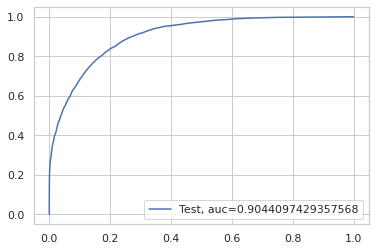

Time Taken by Model: --- 4.413384914398193 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.8604508322584608
Confusion Matrix


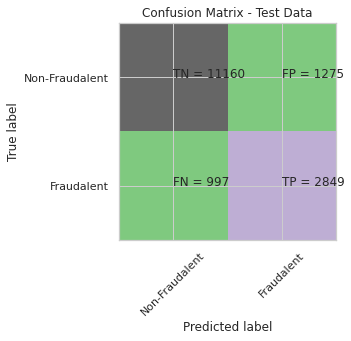

classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     12435
           1       0.69      0.74      0.71      3846

    accuracy                           0.86     16281
   macro avg       0.80      0.82      0.81     16281
weighted avg       0.86      0.86      0.86     16281

XGboost roc_value: 0.9233222115374362
XGBoost threshold: 0.297713041305542
ROC for the test dataset 92.3%


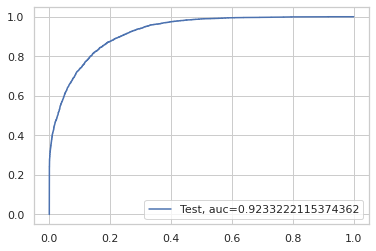

Time Taken by Model: --- 1.1553905010223389 seconds ---
--------------------------------------------------------------------------------


In [70]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , x_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [71]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.793932,0.815739,0.236388
1,Power Transformer,Logistic Regression with L1 Regularisation,0.763774,0.500000,1.500000
2,Power Transformer,KNN,0.814446,0.833875,0.400000
3,Power Transformer,Tree Model with gini criteria,0.798231,0.722892,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.802346,0.727742,1.000000
5,Power Transformer,Random Forest,0.850685,0.900920,0.230000
6,Power Transformer,XGBoost,0.862048,0.917048,0.225523
7,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.809070,0.808891,0.220644
8,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.764537,0.500000,1.500000
9,RepeatedKFold Cross Validation,KNN,0.822072,0.837091,0.400000


**No improvement in result after undersampling data.**



### SMOTE Oversampling technique for all models :
We will use SMOTE Oversampling method to handle the class imbalance.
First we will display class distibution with and without the Random Oversampling.  

Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.  

Once we have train and test dataset we will feed the data to below models:  
Logistic Regression with L2 Regularisation  
Logistic Regression with L1 Regularisation  
KNN  
Decision tree model with Gini criteria  
Decision tree model with Entropy criteria  
Random Forest  
XGBoost  

In [72]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train1 = X.loc[train_index]
    y_train1 = y.loc[train_index] 
    X_test1 = X.loc[test_index]
    y_test1 = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train1, y_train1)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.8132975808648804
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.50516838 -0.08888947  0.01687478  0.2546827  -0.4087824   0.07319996
  -0.17590812  0.11664419  0.32974457  2.3709136   0.3121283   0.48322145
   0.00769082]]
[-0.21357434]
{1: array([[0.80141415, 0.80141415, 0.80141404, 0.8014137 , 0.80139797,
        0.80142831, 0.80410646, 0.81528028, 0.82092266, 0.82137807,
        0.82140151, 0.82140151, 0.82140151, 0.82140151, 0.82140151,
        0.82140151, 0.82140151, 0.82140151, 0.82140151, 0.82140151],
       [0.79653411, 0.79653411, 0.79653411, 0.79653287, 0.79653151,
        0.79677259, 0.80085895, 0.81336103, 0.81893257, 0.81933777,
        0.81932882, 0.81932882, 0.81932882, 0.81932882, 0.81932882,
        0.81932882, 0.81932882, 0.81932882, 0.81932882, 0.81932882],
       [0.78364122, 0.78364133, 0.78364156, 0.78364099, 0.78360839,
        0.78345566, 0.78627021, 0.79748131, 0.80353632, 0

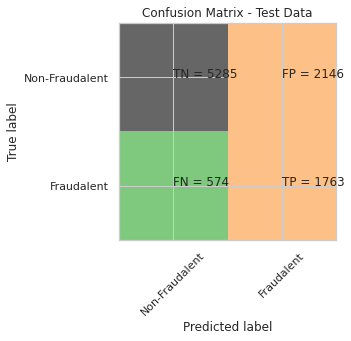

classification Report
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      7431
           1       0.45      0.75      0.56      2337

    accuracy                           0.72      9768
   macro avg       0.68      0.73      0.68      9768
weighted avg       0.79      0.72      0.74      9768

Accuarcy of Logistic model with l1 regularisation : 0.7607493857493858
Confusion Matrix


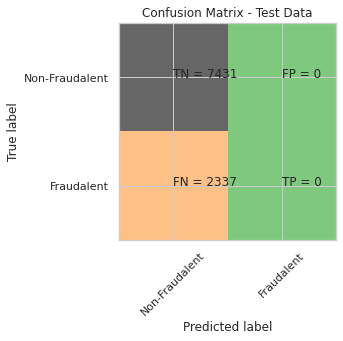

classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7431
           1       0.00      0.00      0.00      2337

    accuracy                           0.76      9768
   macro avg       0.38      0.50      0.43      9768
weighted avg       0.58      0.76      0.66      9768

l2 roc_value: 0.8082044151508383
l2 threshold: 0.45293449037819644
ROC for the test dataset 80.8%


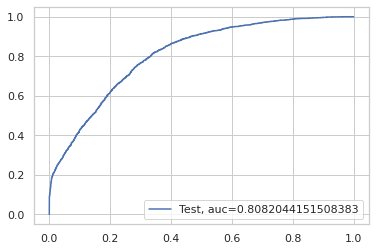

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


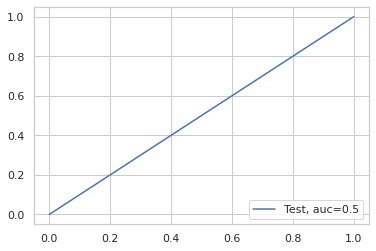

Time Taken by Model: --- 18.72768545150757 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.7648443898443898
Confusion Matrix


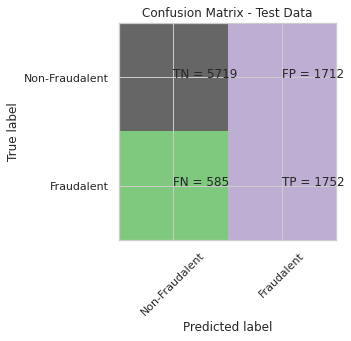

classification Report
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      7431
           1       0.51      0.75      0.60      2337

    accuracy                           0.76      9768
   macro avg       0.71      0.76      0.72      9768
weighted avg       0.81      0.76      0.78      9768

KNN roc_value: 0.8312695598536632
KNN threshold: 0.4
ROC for the test dataset 83.1%


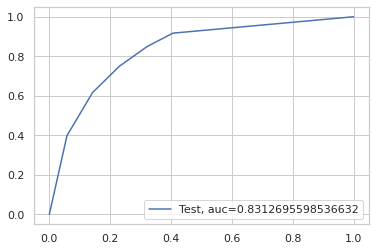

Time Taken by Model: --- 27.0614070892334 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.7976044226044227
Confusion Matrix


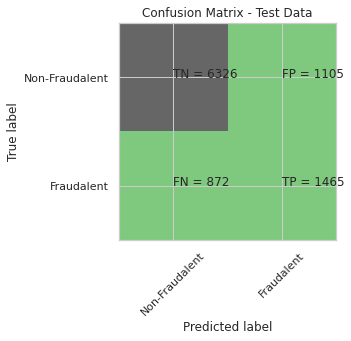

classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7431
           1       0.57      0.63      0.60      2337

    accuracy                           0.80      9768
   macro avg       0.72      0.74      0.73      9768
weighted avg       0.80      0.80      0.80      9768

gini tree_roc_value: 0.7390602298815627
Tree threshold: 1.0
ROC for the test dataset 73.9%


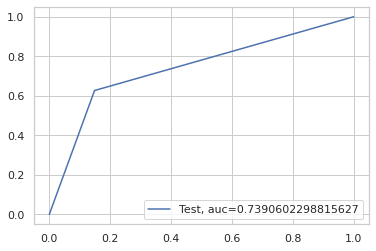

entropy score: 0.7996519246519247
Confusion Matrix


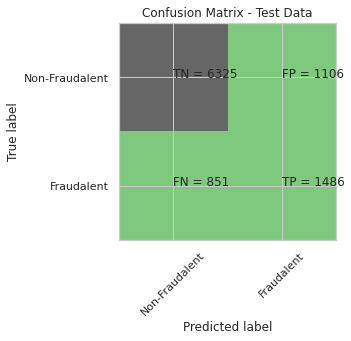

classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      7431
           1       0.57      0.64      0.60      2337

    accuracy                           0.80      9768
   macro avg       0.73      0.74      0.73      9768
weighted avg       0.81      0.80      0.80      9768

entropy tree_roc_value: 0.7434864884738769
Tree threshold: 1.0
ROC for the test dataset 74.3%


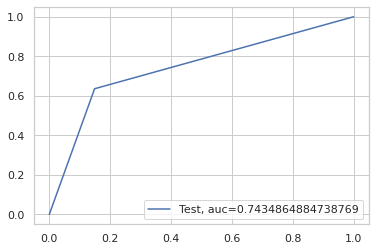

Time Taken by Model: --- 1.8080546855926514 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8477682227682227
Confusion Matrix


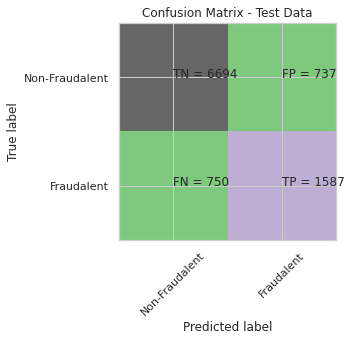

classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7431
           1       0.68      0.68      0.68      2337

    accuracy                           0.85      9768
   macro avg       0.79      0.79      0.79      9768
weighted avg       0.85      0.85      0.85      9768

Random Forest roc_value: 0.9008741497227353
Random Forest threshold: 0.26
ROC for the test dataset 90.1%


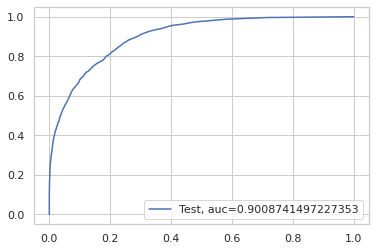

Time Taken by Model: --- 10.28178596496582 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.8638411138411138
Confusion Matrix


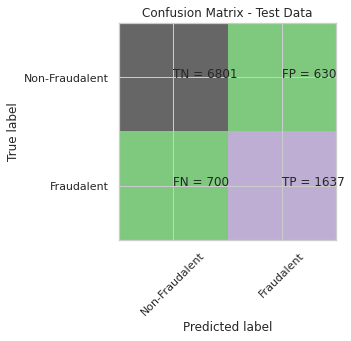

classification Report
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      7431
           1       0.72      0.70      0.71      2337

    accuracy                           0.86      9768
   macro avg       0.81      0.81      0.81      9768
weighted avg       0.86      0.86      0.86      9768

XGboost roc_value: 0.9225656527861201
XGBoost threshold: 0.2612571716308594
ROC for the test dataset 92.3%


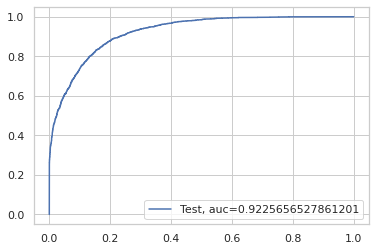

Time Taken by Model: --- 18.05200743675232 seconds ---
--------------------------------------------------------------------------------


In [73]:
Data_Imbalance_Handiling  = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test1, y_test1)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test1, y_test1)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test1, y_test1)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test1, y_test1)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test1, y_test1)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [74]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.793932,0.815739,0.236388
1,Power Transformer,Logistic Regression with L1 Regularisation,0.763774,0.500000,1.500000
2,Power Transformer,KNN,0.814446,0.833875,0.400000
3,Power Transformer,Tree Model with gini criteria,0.798231,0.722892,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.802346,0.727742,1.000000
5,Power Transformer,Random Forest,0.850685,0.900920,0.230000
6,Power Transformer,XGBoost,0.862048,0.917048,0.225523
7,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.809070,0.808891,0.220644
8,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.764537,0.500000,1.500000
9,RepeatedKFold Cross Validation,KNN,0.822072,0.837091,0.400000


Using **SMOTE** for handling class imbalance has **not helped much** Still the best performing model is **XGBoost with StratifiedKFold** Cross Validation having **AUC 0.9244**

### Applying ADASYN Oversampling for all models:

In [86]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)
ADASYN = over_sampling.ADASYN(random_state=0)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test1 = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
# Create Dataframe for X_over: 
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,  columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.7772707334479865
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.50490813 -0.05343702  0.00811471  0.23403433 -0.36037166  0.05638536
  -0.18940742  0.08310992  0.27604211  2.13079116  0.19070488  0.45942404
  -0.00536416]]
[-0.0676577]
{1: array([[0.75839451, 0.75839407, 0.75839429, 0.75839774, 0.75854159,
        0.7595943 , 0.76356743, 0.77373167, 0.78026805, 0.78096558,
        0.78101123, 0.78101123, 0.78101123, 0.78101123, 0.78101123,
        0.78101123, 0.78101123, 0.78101123, 0.78101123, 0.78101123],
       [0.75382541, 0.75382519, 0.7538253 , 0.75382597, 0.75396781,
        0.75479123, 0.75799941, 0.76703333, 0.77435027, 0.77552539,
        0.77562392, 0.77562392, 0.77562392, 0.77562392, 0.77562392,
        0.77562392, 0.77562392, 0.77562392, 0.77562392, 0.77562392],
       [0.75043201, 0.75043146, 0.75043168, 0.75043301, 0.75053411,
        0.75134029, 0.75505213, 0.76572625, 0.77255327, 0.

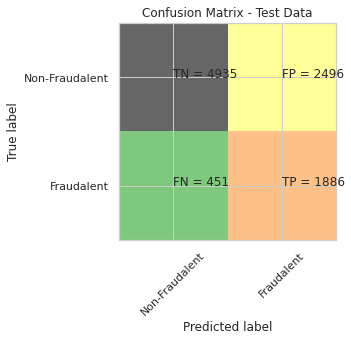

classification Report
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      7431
           1       0.43      0.81      0.56      2337

    accuracy                           0.70      9768
   macro avg       0.67      0.74      0.67      9768
weighted avg       0.80      0.70      0.72      9768

Accuarcy of Logistic model with l1 regularisation : 0.7607493857493858
Confusion Matrix


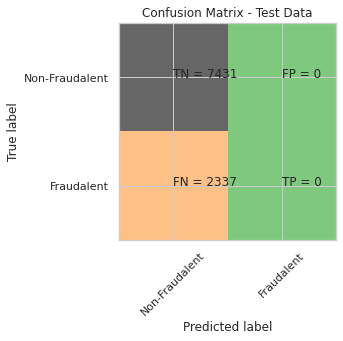

classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7431
           1       0.00      0.00      0.00      2337

    accuracy                           0.76      9768
   macro avg       0.38      0.50      0.43      9768
weighted avg       0.58      0.76      0.66      9768

l2 roc_value: 0.8069826197911387
l2 threshold: 0.5172014934337338
ROC for the test dataset 80.7%


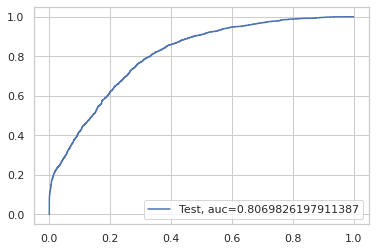

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


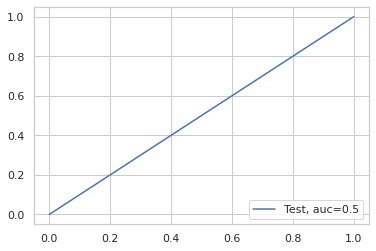

Time Taken by Model: --- 21.82201623916626 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.73996723996724
Confusion Matrix


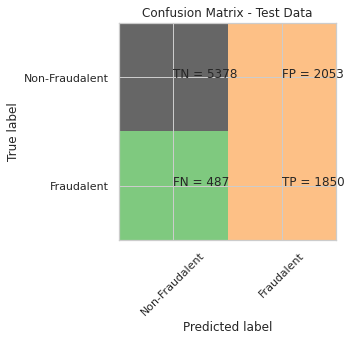

classification Report
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      7431
           1       0.47      0.79      0.59      2337

    accuracy                           0.74      9768
   macro avg       0.70      0.76      0.70      9768
weighted avg       0.81      0.74      0.76      9768

KNN roc_value: 0.8242226141318847
KNN threshold: 0.4
ROC for the test dataset 82.4%


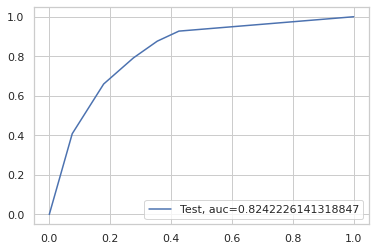

Time Taken by Model: --- 32.15415954589844 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.7945331695331695
Confusion Matrix


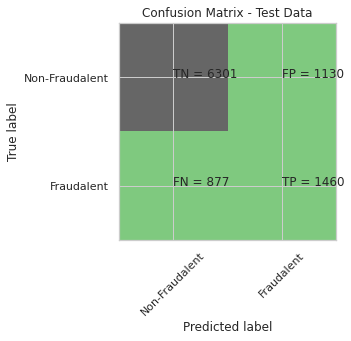

classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7431
           1       0.56      0.62      0.59      2337

    accuracy                           0.79      9768
   macro avg       0.72      0.74      0.73      9768
weighted avg       0.80      0.79      0.80      9768

gini tree_roc_value: 0.7363334461383626
Tree threshold: 1.0
ROC for the test dataset 73.6%


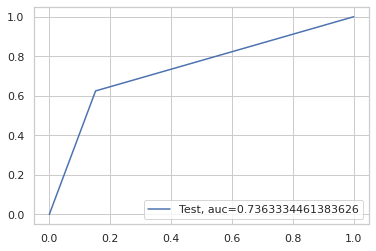

entropy score: 0.79995904995905
Confusion Matrix


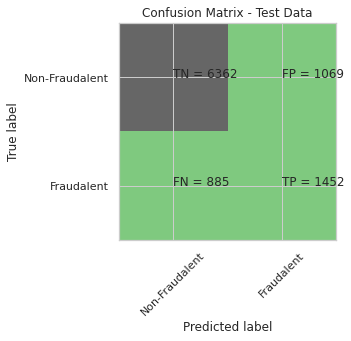

classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7431
           1       0.58      0.62      0.60      2337

    accuracy                           0.80      9768
   macro avg       0.73      0.74      0.73      9768
weighted avg       0.81      0.80      0.80      9768

entropy tree_roc_value: 0.7388839684244961
Tree threshold: 0.5
ROC for the test dataset 73.9%


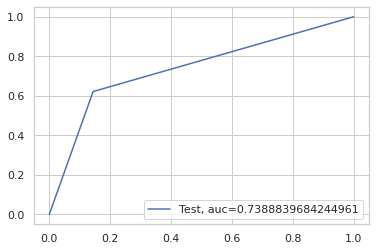

Time Taken by Model: --- 1.8611407279968262 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.8415233415233415
Confusion Matrix


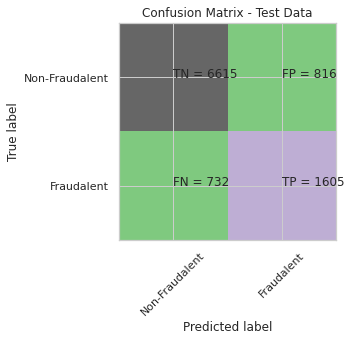

classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7431
           1       0.66      0.69      0.67      2337

    accuracy                           0.84      9768
   macro avg       0.78      0.79      0.78      9768
weighted avg       0.84      0.84      0.84      9768

Random Forest roc_value: 0.8994617259561033
Random Forest threshold: 0.27
ROC for the test dataset 89.9%


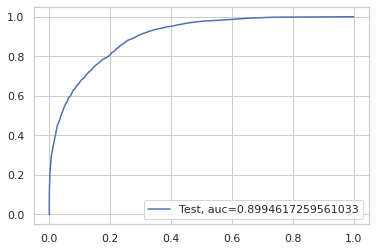

Time Taken by Model: --- 10.453590393066406 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.8648648648648649
Confusion Matrix


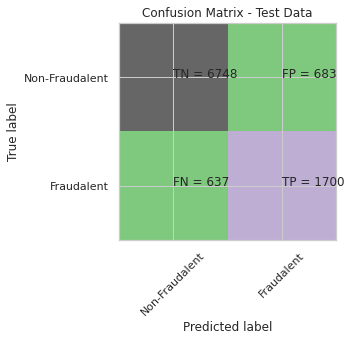

classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7431
           1       0.71      0.73      0.72      2337

    accuracy                           0.86      9768
   macro avg       0.81      0.82      0.82      9768
weighted avg       0.87      0.86      0.87      9768

XGboost roc_value: 0.9223038518339627
XGBoost threshold: 0.3498305678367615
ROC for the test dataset 92.2%


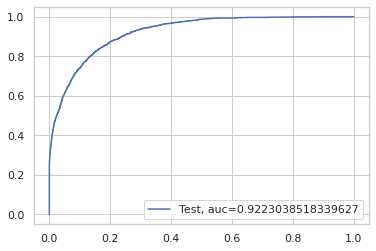

Time Taken by Model: --- 7.3758745193481445 seconds ---
--------------------------------------------------------------------------------


In [87]:
Data_Imbalance_Handiling = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test1)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test1)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test1)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test1)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test1)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [88]:
df_Results

,Data_Imbalance_Handiling,Model,Accuracy,roc_value,threshold
0,Power Transformer,Logistic Regression with L2 Regularisation,0.793932,0.815739,0.236388
1,Power Transformer,Logistic Regression with L1 Regularisation,0.763774,0.500000,1.500000
2,Power Transformer,KNN,0.814446,0.833875,0.400000
3,Power Transformer,Tree Model with gini criteria,0.798231,0.722892,1.000000
4,Power Transformer,Tree Model with entropy criteria,0.802346,0.727742,1.000000
5,Power Transformer,Random Forest,0.850685,0.900920,0.230000
6,Power Transformer,XGBoost,0.862048,0.917048,0.225523
7,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.809070,0.808891,0.220644
8,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.764537,0.500000,1.500000
9,RepeatedKFold Cross Validation,KNN,0.822072,0.837091,0.400000


Using **ADASYN** for handling class imbalance has **not helped** much Still the best performing model is **XGBoost with StratifiedKFold** Cross Validation having **AUC 0.9244**

### Parameter Tuning for Final XGBoost Model by Handling class imbalance

In [78]:
#Lets tune XGBoost Model for max_depth and min_child_weight:

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_Smote, y_train_Smote)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([3.31748304, 3.03767085, 2.92753634, 4.72817979, 4.77457085,
         4.67651696, 6.65832801, 6.58853264, 6.30410514, 8.80856814,
         8.42549572, 8.18465028]),
  'std_fit_time': array([0.10295981, 0.05165028, 0.01210812, 0.09858513, 0.20100014,
         0.08882156, 0.15609613, 0.23478571, 0.17397101, 0.29326958,
         0.3483547 , 0.32166265]),
  'mean_score_time': array([0.07148371, 0.05848656, 0.05369978, 0.08500714, 0.08007565,
         0.08292742, 0.1043242 , 0.10201588, 0.09987025, 0.12902398,
         0.12694473, 0.12543421]),
  'std_score_time': array([0.01024864, 0.00895945, 0.00360245, 0.00811652, 0.00312312,
         0.00520859, 0.00313285, 0.00448383, 0.0038019 , 0.0016034 ,
         0.00311891, 0.00316349]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [79]:
#Lets tune XGBoost Model for n_estimators:

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_Smote, y_train_Smote)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.95336509, 2.47968554, 2.99165182, 3.58834209, 4.32896161]),
  'std_fit_time': array([0.07548938, 0.15591771, 0.09370479, 0.14767581, 0.1038076 ]),
  'mean_score_time': array([0.03234525, 0.04068727, 0.05030546, 0.06048617, 0.06769276]),
  'std_score_time': array([0.00386985, 0.00165686, 0.00165723, 0.00338937, 0.0009414 ]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([0.90720209, 0.91075124, 0.91168907, 0.91280166, 0.91353198]),
  'split1_test_score': array([0.92730269, 0.93215369, 0.93535416, 0.93695477, 0.93845984]),
  'split2_test_score': array([0.94822462, 0.95523032, 0.95990387, 0.9627842 , 0.96570564]),
  'split3_test_score': array([0.94874926, 0.95581791,

In [82]:
# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[130,140,150],
  'max_depth':[6,7,9,10],
 'min_child_weight':[2,3,4]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0,
               missing=None, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
              param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_Smote, y_train_Smote)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 6.95582767,  7.65522671,  7.90590129,  7.0732049 ,  7.77285843,
          8.17605777,  7.05006485,  7.62215452,  8.05834761,  8.17742982,
          8.92395005,  9.59408441,  8.15618978,  8.95717463,  9.33842506,
          8.31069417,  8.93886619,  9.28198404, 10.82648487, 11.55145369,
         12.2697845 , 10.83049464, 11.52098298, 12.11379547, 10.79660726,
         11.39917474, 12.06615915, 12.22759228, 12.80976148, 13.88009806,
         11.88363242, 12.83616118, 13.77174473, 11.69223323, 12.97696147,
         13.67684379]),
  'std_fit_time': array([0.25370848, 0.11504069, 0.15682155, 0.14959126, 0.1872769 ,
         0.26642812, 0.13613861, 0.1474875 , 0.20326615, 0.09983663,
         0.26659033, 0.38722233, 0.25557533, 0.10367308, 0.28568193,
         0.39868835, 0.17251944, 0.2267983 , 0.27069211, 0.5562718 ,
         0.33094766, 0.21864701, 0.32331866, 0.53413213, 0.29232593,
         0.34277717, 0.36552548, 0.28594332, 0.26246241, 0.45975231,
         0.

In [81]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train_Smote, y_train_Smote)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([4.93592625, 4.92230043, 4.83840857, 4.97087417, 4.89916725]),
  'std_fit_time': array([0.18932483, 0.14686529, 0.14375853, 0.261667  , 0.19504081]),
  'mean_score_time': array([0.08478775, 0.09300537, 0.08312063, 0.08436484, 0.07819719]),
  'std_score_time': array([0.0020729 , 0.01169737, 0.00462072, 0.00654934, 0.00721895]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([0.91374398, 0.91752027, 0.91856607, 0.91842349, 0.92019205]),
  'split1_test_score': array([0.93696272, 0.94379134, 0.9462942 , 0.94834844, 0.95033126]),
  'split2_test_score': array([0.96310324, 0.9761019 , 0.98010155, 0.98266863, 0.98655953]),
  'split3_test_score': array([0.961

### Step 3.6 Using PyCaret AutoML :  
PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.  
https://pycaret.readthedocs.io/en/latest/index.html

In [60]:
from pycaret.classification import *

In [61]:
# Setup function initializes the environment and creates the transformation pipeline
clf = setup(data=df_train, target="high_income", session_id=123)

,Description,Value
0,session_id,123
1,Target,high_income
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(32561, 14)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [62]:
# Compares different models depending on their performance metrics. By default sorted by accuracy
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8732,0.9261,0.6588,0.7796,0.7140,0.6333,0.6370,0.2260
gbc,Gradient Boosting Classifier,0.8647,0.9181,0.5825,0.8011,0.6741,0.5915,0.6037,0.7340
ada,Ada Boost Classifier,0.8599,0.9121,0.6084,0.7614,0.6761,0.5881,0.5943,0.2620
rf,Random Forest Classifier,0.8542,0.9015,0.6199,0.7326,0.6714,0.5785,0.5820,0.6840
lda,Linear Discriminant Analysis,0.8401,0.8908,0.5608,0.7130,0.6277,0.5277,0.5340,0.0960
ridge,Ridge Classifier,0.8382,0.0000,0.5005,0.7431,0.5981,0.5016,0.5170,0.4560
et,Extra Trees Classifier,0.8313,0.8780,0.5947,0.6674,0.6289,0.5202,0.5217,0.3080
dt,Decision Tree Classifier,0.8112,0.7487,0.6277,0.6032,0.6152,0.4902,0.4904,0.4600
nb,Naive Bayes,0.7926,0.8007,0.3078,0.6434,0.4163,0.3088,0.3399,0.4460
lr,Logistic Regression,0.7910,0.6948,0.2792,0.6549,0.3911,0.2887,0.3273,0.7400


#### Best performing model is Light Gradient Boosting Machine (lightgbm) with accuracy as 0.8732 and AUC as 0.9261.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


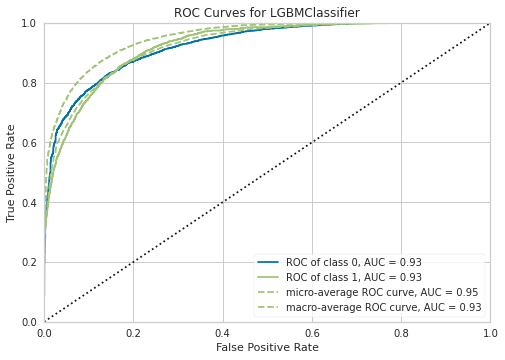

In [63]:
# Plots the AUC curve
plot_model(best_model, plot="auc")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


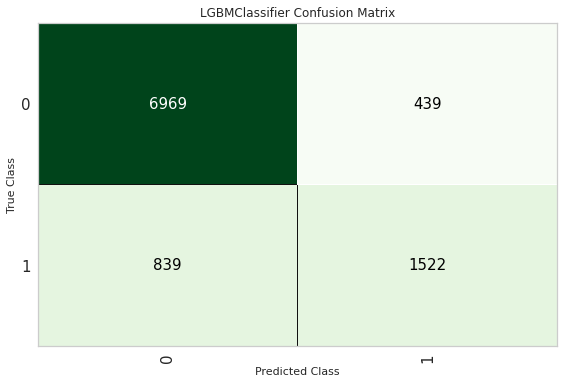

In [64]:
# Tune model function performs a grid search to identify the best parameters
tuned = tune_model(best_model)
plot_model(tuned, plot="confusion_matrix")

There are total 8,491 correct classification and 1,278 as incorrect classification.

In [65]:
# Predict on holdout set
predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8692,0.9253,0.6446,0.7761,0.7043,0.6212,0.6256


,age,fnlwgt,capital-gain,capital-loss,hours-per-week,native-country,workclass_0,workclass_1,workclass_2,workclass_3,...,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,high_income,Label,Score
0,55.0,199713.0,0.0,0.0,15.0,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.6890
1,65.0,115890.0,0.0,0.0,20.0,38.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8120
2,29.0,145592.0,0.0,0.0,40.0,12.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9823
3,53.0,231472.0,0.0,0.0,40.0,38.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.8518
4,32.0,107218.0,0.0,0.0,40.0,38.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,29.0,136017.0,0.0,0.0,48.0,38.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9777
9765,28.0,185957.0,0.0,0.0,40.0,38.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.7040
9766,38.0,172755.0,0.0,0.0,40.0,38.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9554
9767,25.0,178505.0,0.0,1504.0,45.0,38.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.9445


In [66]:
# Finalize the model by retraining on the entire seen data set
final_model = finalize_model(tuned)

In [67]:
# Predicting on unseen data
predictions = predict_model(final_model, data=df_test)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8724,0.9256,0.6511,0.7731,0.7068,0.6261,0.6299


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,high_income,Label,Score
0,25,3,226802,1,4,6,3,2,1,0,0,40,38,0,0,0.9961
1,38,3,89814,11,2,4,0,4,1,0,0,50,38,0,0,0.8392
2,28,1,336951,7,2,10,0,4,1,0,0,40,38,1,0,0.7076
3,44,3,160323,15,2,6,0,2,1,7688,0,40,38,1,1,0.9860
4,18,3,103497,15,4,9,3,4,0,0,0,30,38,0,0,0.9991


#### Saving best performing model found by AutoML:

In [68]:
# Model will be saved as .pkl and can be utilized for serving
save_model(tuned,'Tuned Census Model 31-05-2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='high_income', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1,